# Assigment Part I - IPYNB File

## Step-1: Reading the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pyplot import xticks
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_columns', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option("max_rows", None)
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
sns.set(style='darkgrid')

- We import the necessary libraries and pass the necessary codes which would aid and make our logistic regression modeling process and analysis smoother.

In [2]:
pd.read_csv('Leads Data Dictionary.csv')

,Variables,Description
0,Prospect ID,A unique ID with which the customer is identified.
1,Lead Number,A lead number assigned to each lead procured.
2,Lead Origin,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."
3,Lead Source,"The source of the lead. Includes Google, Organic Search, Olark Chat, etc."
4,Do Not Email,An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
5,Do Not Call,An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
6,Converted,The target variable. Indicates whether a lead has been successfully converted or not.
7,TotalVisits,The total number of visits made by the customer on the website.
8,Total Time Spent on Website,The total time spent by the customer on the website.
9,Page Views Per Visit,Average number of pages on the website viewed during the visits.


- As we can see from the data dictionary above, the dataset has 37 columns which specify its features.

We proceed to read the data file. 

In [3]:
Leads_DF = pd.read_csv('Leads.csv')

In [4]:
Leads_DF.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0000,0,0.0000,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0000,15.0000,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0000,674,2.5000,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0000,15.0000,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0000,1532,2.0000,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0000,20.0000,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0000,305,1.0000,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0000,17.0000,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0000,1428,1.0000,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0000,18.0000,No,No,Modified


In [5]:
Leads_DF.shape

(9240, 37)

The shape of the dataset tells us that there are 9240 leads with 37 features (we have seen the features above from the data dictionary).

In [6]:
Leads_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

There are no inconsistent data types. We would check the data types again in the data cleaning step to confirm if any conversions are required (Step-2 of logistic regression process).

In [7]:
Leads_DF.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.0000,9240.0000,9103.0000,9240.0000,9103.0000,5022.0000,5022.0000
mean,617188.4356,0.3854,3.4452,487.6983,2.3628,14.3063,16.3449
std,23405.9957,0.4867,4.8549,548.0215,2.1614,1.3867,1.8114
min,579533.0000,0.0000,0.0000,0.0000,0.0000,7.0000,11.0000
25%,596484.5000,0.0000,1.0000,12.0000,1.0000,14.0000,15.0000
50%,615479.0000,0.0000,3.0000,248.0000,2.0000,14.0000,16.0000
75%,637387.2500,1.0000,5.0000,936.0000,3.0000,15.0000,18.0000
max,660737.0000,1.0000,251.0000,2272.0000,55.0000,18.0000,20.0000


There is nothing unusual by looking into the different parameters of the describe function as of now.

## Step-2: Cleaning the Dataset

In [8]:
Leads_DF.loc[Leads_DF.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


There are no duplicate values.

In [9]:
Leads_DF.dtypes

Prospect ID                                      object 
Lead Number                                      int64  
Lead Origin                                      object 
Lead Source                                      object 
Do Not Email                                     object 
Do Not Call                                      object 
Converted                                        int64  
TotalVisits                                      float64
Total Time Spent on Website                      int64  
Page Views Per Visit                             float64
Last Activity                                    object 
Country                                          object 
Specialization                                   object 
How did you hear about X Education               object 
What is your current occupation                  object 
What matters most to you in choosing a course    object 
Search                                           object 
Magazine                       

As mentioned under input 6 of the notebook, after using the info function, by double checking the data types with the dtypes function, we do not find any inconsistent data and hence, no conversions are required.

**Dropping Columns** <br>
We will check the dataframe in order to decide which columns can be dropped based on the fact that they have no use in the logistics logistic regression model process.  

In [10]:
Leads_DF.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0000,0,0.0000,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0000,15.0000,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0000,674,2.5000,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0000,15.0000,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0000,1532,2.0000,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0000,20.0000,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0000,305,1.0000,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0000,17.0000,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0000,1428,1.0000,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0000,18.0000,No,No,Modified


- We see that the 'Prospect ID' column and 'Lead Number' column have unique values i.e. they would not significantly contribute to help us find any inference on any kind of leads, hence we will drop them.

In [11]:
Leads_DF.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

**Null values treatment** <br>
We will now proceed to see the null values of each column of the dataframe and take actions to treat them.

In [12]:
Leads_DF.isnull().sum()

Lead Origin                                      0   
Lead Source                                      36  
Do Not Email                                     0   
Do Not Call                                      0   
Converted                                        0   
TotalVisits                                      137 
Total Time Spent on Website                      0   
Page Views Per Visit                             137 
Last Activity                                    103 
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                           0   
Magazine                                         0   
Newspaper Article                                0   
X Education Forums                               0   
Newspaper                   

- We see a considerable amount of null values across different columns. 

We will check the head of the dataset to inspect the values of different columns in order to derive insights, if any, from it. 

In [13]:
Leads_DF.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0000,0,0.0000,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0000,15.0000,No,No,Modified
1,API,Organic Search,No,No,0,5.0000,674,2.5000,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0000,15.0000,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0000,1532,2.0000,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0000,20.0000,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0000,305,1.0000,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0000,17.0000,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0000,1428,1.0000,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0000,18.0000,No,No,Modified


From the above head of our dataset, we can see that some columns have 'select' as a value. This could be attributed to the fact that the respondents did not select any option from the list, hence it shows 'select', or the values have been inserted or left as 'select'. These 'select' values are as good as a null value in nature and hence we would convert the 'select' values to Nan. 

**1. Converting 'Select' values to 'Nan'** <br>

In [14]:
Leads_DF = Leads_DF.replace('Select', np.nan)

In [15]:
Leads_DF.isnull().sum()

Lead Origin                                      0   
Lead Source                                      36  
Do Not Email                                     0   
Do Not Call                                      0   
Converted                                        0   
TotalVisits                                      137 
Total Time Spent on Website                      0   
Page Views Per Visit                             137 
Last Activity                                    103 
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                           0   
Magazine                                         0   
Newspaper Article                                0   
X Education Forums                               0   
Newspaper                   

- We see that the number of null values of gone up after replacing 'select' with Nan. For e.g. 'Specialization' had 1438 null values before, which went upto 3380 null values after replacement and 'How did you hear about X Education' had 2207 null values, which went upto 7250 null value after replacement. <br>
- As seen from above null values table, there are 17 columns with null values. We will proceed to have a look at the percentage amount of null values for each of these columna beforing deciding how to treat these values. 

**2. Columns with more than 70% null values**

In [16]:
round(100*(Leads_DF.isnull().sum()/len(Leads_DF.index)), 2)

Lead Origin                                     0.0000 
Lead Source                                     0.3900 
Do Not Email                                    0.0000 
Do Not Call                                     0.0000 
Converted                                       0.0000 
TotalVisits                                     1.4800 
Total Time Spent on Website                     0.0000 
Page Views Per Visit                            1.4800 
Last Activity                                   1.1100 
Country                                         26.6300
Specialization                                  36.5800
How did you hear about X Education              78.4600
What is your current occupation                 29.1100
What matters most to you in choosing a course   29.3200
Search                                          0.0000 
Magazine                                        0.0000 
Newspaper Article                               0.0000 
X Education Forums                              

- We see from the above percentage amount of null values for each column, that the two columns 'How did you hear about X Education' and 'Lead Profile' have more than 70% of its values as null. These two columns in particular would not contribute significantly to the logitistic regression model, and hence can be dropped.  

In [17]:
Leads_DF.drop(['How did you hear about X Education','Lead Profile'], 1, inplace = True)

In [18]:
Leads_DF.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0000,0,0.0000,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,02.Medium,02.Medium,15.0000,15.0000,No,No,Modified
1,API,Organic Search,No,No,0,5.0000,674,2.5000,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,02.Medium,02.Medium,15.0000,15.0000,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0000,1532,2.0000,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,02.Medium,01.High,14.0000,20.0000,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0000,305,1.0000,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,02.Medium,01.High,13.0000,17.0000,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0000,1428,1.0000,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,02.Medium,01.High,15.0000,18.0000,No,No,Modified


- We see that the 'Prospect ID', 'Lead Number, 'How did you hear about X Education' and 'Lead Profile' columns have been dropped.

In [19]:
round(100*(Leads_DF.isnull().sum()/len(Leads_DF.index)), 2)

Lead Origin                                     0.0000 
Lead Source                                     0.3900 
Do Not Email                                    0.0000 
Do Not Call                                     0.0000 
Converted                                       0.0000 
TotalVisits                                     1.4800 
Total Time Spent on Website                     0.0000 
Page Views Per Visit                            1.4800 
Last Activity                                   1.1100 
Country                                         26.6300
Specialization                                  36.5800
What is your current occupation                 29.1100
What matters most to you in choosing a course   29.3200
Search                                          0.0000 
Magazine                                        0.0000 
Newspaper Article                               0.0000 
X Education Forums                              0.0000 
Newspaper                                       

   We will now proceed to treat each of the remaining columns with null values.  
   **NOTE :** By conducting the null values analysis, we are inspecting each column and passing our inference on them, by virtue of which we are conducting the **univariate analysis** as well. 

**3. 'Lead Quality' Column** <br>
We see that the 'Lead Quality' column has the next highest amount of null values. We will see whether we should drop the entire column or impute the missings with the appropriate value.   

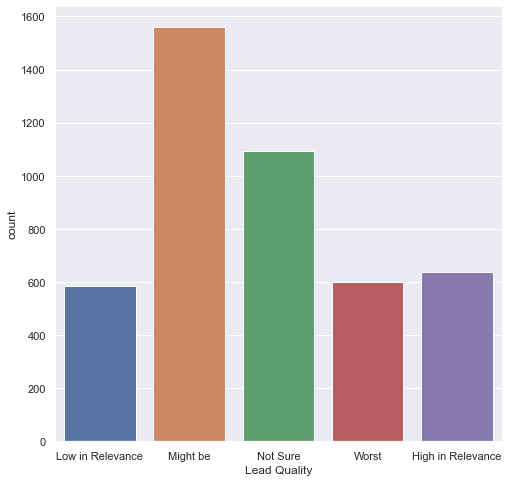

In [20]:
sns.countplot(Leads_DF['Lead Quality'])

- We see that the employee(s)' intuiton leads to categorising the leads in a way that the highest column or a large chunk of the respondents fall in the 'might be' column, followed by 'High in Relevance' and 'Low in Relevance'. 
- We would want to keep the 'lead quality' column for the regression model, as it does show the preference or intuition of the respondent. So, taking the this decision, we would impute the miaaing values with a value from this column.  

Now, looking at the categories of the above countplot, we find the 'Not Sure' category to be the safest bet for imputing the null values in this column as it would be the accurate feeling for the majority respondents.  

In [21]:
Leads_DF['Lead Quality'] = Leads_DF['Lead Quality'].replace(np.nan, 'Not Sure')

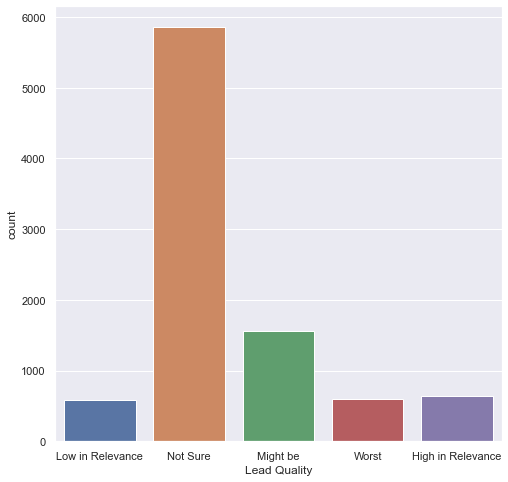

In [22]:
sns.countplot(Leads_DF['Lead Quality'])

- We see the values have been updated in the 'Not Sure' with the substantial increase in its corresponding bar above. This increase in the bar is obvious given almost 50% of the values of the column have just been added to this bar. 

In [23]:
round(100*(Leads_DF.isnull().sum()/len(Leads_DF.index)), 2)

Lead Origin                                     0.0000 
Lead Source                                     0.3900 
Do Not Email                                    0.0000 
Do Not Call                                     0.0000 
Converted                                       0.0000 
TotalVisits                                     1.4800 
Total Time Spent on Website                     0.0000 
Page Views Per Visit                            1.4800 
Last Activity                                   1.1100 
Country                                         26.6300
Specialization                                  36.5800
What is your current occupation                 29.1100
What matters most to you in choosing a course   29.3200
Search                                          0.0000 
Magazine                                        0.0000 
Newspaper Article                               0.0000 
X Education Forums                              0.0000 
Newspaper                                       

- We see there are not any more null values in the 'Lead Quality' column. 

**4. Columns with 45%-46% null values** <br>
We switch our focus to the next group of columns which have significant null values. Our eyes fix us on the 'Asymmetrique Activity Index',           
'Asymmetrique Profile Index', 'Asymmetrique Activity Score' and 'Asymmetrique Profile Score' columns, which have null values in the 45%-46% mark.   

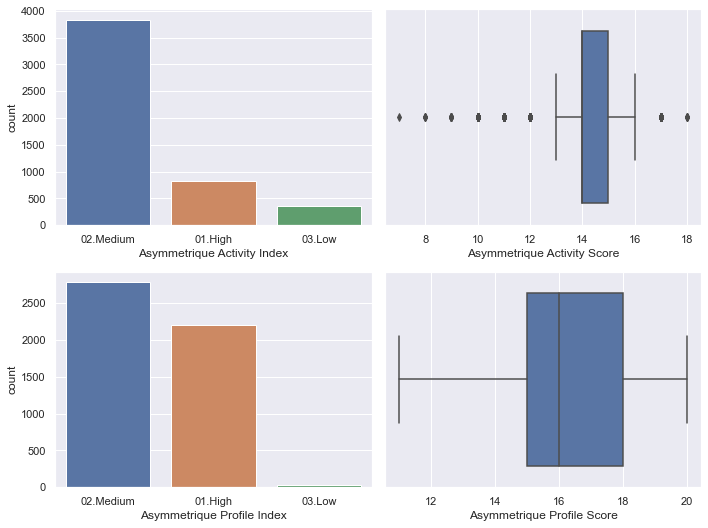

In [24]:
fig, axs = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot(Leads_DF['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.boxplot(Leads_DF['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(Leads_DF['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.boxplot(Leads_DF['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

- As we can see from the barplots and boxplots above, there is too much ambiguity, inconsistency and variation in the categories of these columns, with not much clear inferences from it. Hence, we need to drop these columns. 

In [25]:
Leads_DF = Leads_DF.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [26]:
round(100*(Leads_DF.isnull().sum()/len(Leads_DF.index)), 2)

Lead Origin                                     0.0000 
Lead Source                                     0.3900 
Do Not Email                                    0.0000 
Do Not Call                                     0.0000 
Converted                                       0.0000 
TotalVisits                                     1.4800 
Total Time Spent on Website                     0.0000 
Page Views Per Visit                            1.4800 
Last Activity                                   1.1100 
Country                                         26.6300
Specialization                                  36.5800
What is your current occupation                 29.1100
What matters most to you in choosing a course   29.3200
Search                                          0.0000 
Magazine                                        0.0000 
Newspaper Article                               0.0000 
X Education Forums                              0.0000 
Newspaper                                       

- Now, we are left with 10 columns with null values. We will proceed to treat each one of them.

**5. 'Country' Column** <br>
Now, we will see the 'Country' column and see what we could do with the null values. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 <a list of 38 Text major ticklabel objects>)

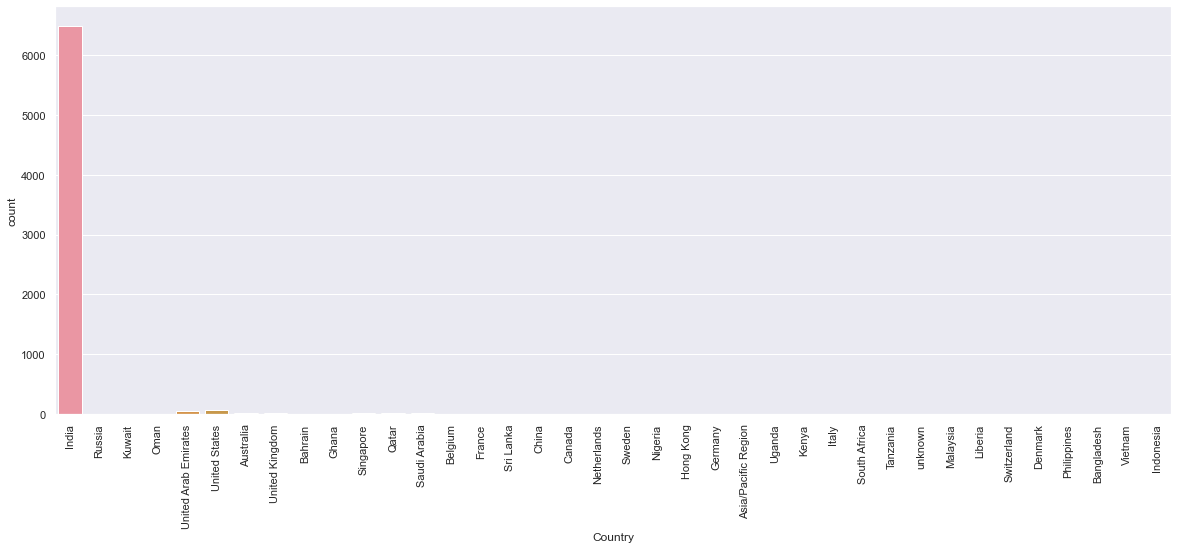

In [27]:
fig, axs = plt.subplots(figsize = (20,7.5))
sns.countplot(Leads_DF['Country'])
plt.xticks(rotation = 90)    

- We can see that one bar, India, has most of the values or respondents. 

In [28]:
Leads_DF['Country'].describe()

count     6779 
unique    38   
top       India
freq      6492 
Name: Country, dtype: object

By observing the information by using the desrcibe function on the 'country' column, we can infer that most of the respondents were from the country 'India'. Hence, we can conclude that the null values in the columns would also have been in majority from 'India'. Hence, we will replace the null values with the value 'India'. 

In [29]:
Leads_DF['Country'] = Leads_DF['Country'].replace(np.nan, 'India')

In [30]:
round(100*(Leads_DF.isnull().sum()/len(Leads_DF.index)), 2)

Lead Origin                                     0.0000 
Lead Source                                     0.3900 
Do Not Email                                    0.0000 
Do Not Call                                     0.0000 
Converted                                       0.0000 
TotalVisits                                     1.4800 
Total Time Spent on Website                     0.0000 
Page Views Per Visit                            1.4800 
Last Activity                                   1.1100 
Country                                         0.0000 
Specialization                                  36.5800
What is your current occupation                 29.1100
What matters most to you in choosing a course   29.3200
Search                                          0.0000 
Magazine                                        0.0000 
Newspaper Article                               0.0000 
X Education Forums                              0.0000 
Newspaper                                       

- Now we are left with 4 columns with less 2% of null values and 5 columns with double digit null values.

**6. 'Specialization' Column** <br>
Now, we will see the 'Specialization' column and see what we could do with the null values.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text major ticklabel objects>)

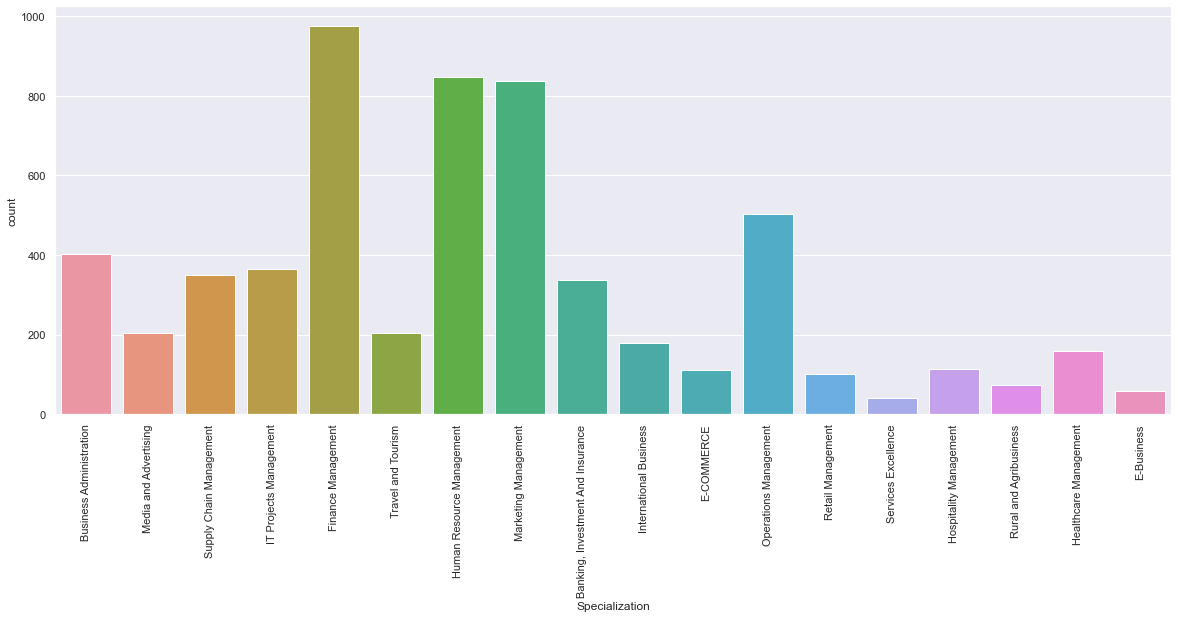

In [31]:
fig, axs = plt.subplots(figsize = (20,7.5))
sns.countplot(Leads_DF['Specialization'])
plt.xticks(rotation = 90)    

- So, we see that the 'Specialization' column is a specific area in which the respondents have disciplined themselves in. Hence, the null values or respondents for whom there is no value, cannot have a common value from any of the categories in the above plot. Hence we will assign a 'miscellaneous' or 'others' value to them.   

In [32]:
Leads_DF['Specialization'] = Leads_DF['Specialization'].replace(np.nan, 'Others')

In [33]:
round(100*(Leads_DF.isnull().sum()/len(Leads_DF.index)), 2)

Lead Origin                                     0.0000 
Lead Source                                     0.3900 
Do Not Email                                    0.0000 
Do Not Call                                     0.0000 
Converted                                       0.0000 
TotalVisits                                     1.4800 
Total Time Spent on Website                     0.0000 
Page Views Per Visit                            1.4800 
Last Activity                                   1.1100 
Country                                         0.0000 
Specialization                                  0.0000 
What is your current occupation                 29.1100
What matters most to you in choosing a course   29.3200
Search                                          0.0000 
Magazine                                        0.0000 
Newspaper Article                               0.0000 
X Education Forums                              0.0000 
Newspaper                                       

- Now we are left with 4 columns with less 2% of null values and 4 columns with double digit null values.

**7. 'What is your current occupation' Column** <br>
Now, we will see the 'What is your current occupation' column and see what we could do with the null values.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

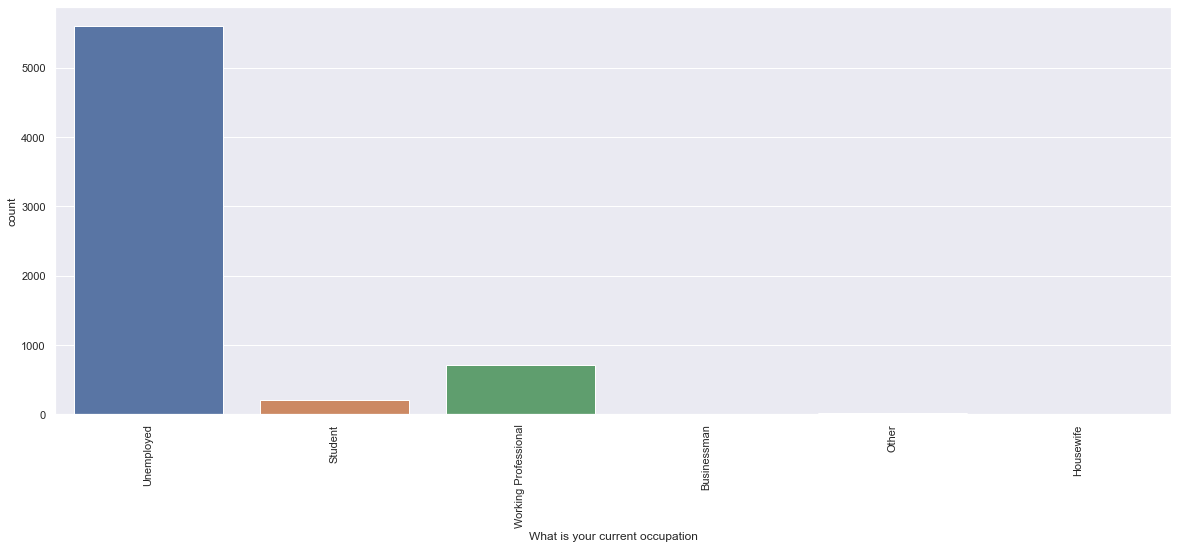

In [34]:
fig, axs = plt.subplots(figsize = (20,7.5))
sns.countplot(Leads_DF['What is your current occupation'])
plt.xticks(rotation = 90)    

- So, we see that the 'What is your current occupation' column is a specific area in which the respondents are either employed or unemployed. Hence, the null values or respondents for whom there is no value, even if the majority respondents are unemployed, cannot be assigned as 'unemployed' as the respondents may be a stuent who is unemployed or a businessman or a housewife or might have some compulsion to not reveal anything about their occupation status. Hence we will assign the 'other' value to them.

In [35]:
Leads_DF['What is your current occupation' ] = Leads_DF['What is your current occupation' ].replace(np.nan, 'Other')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

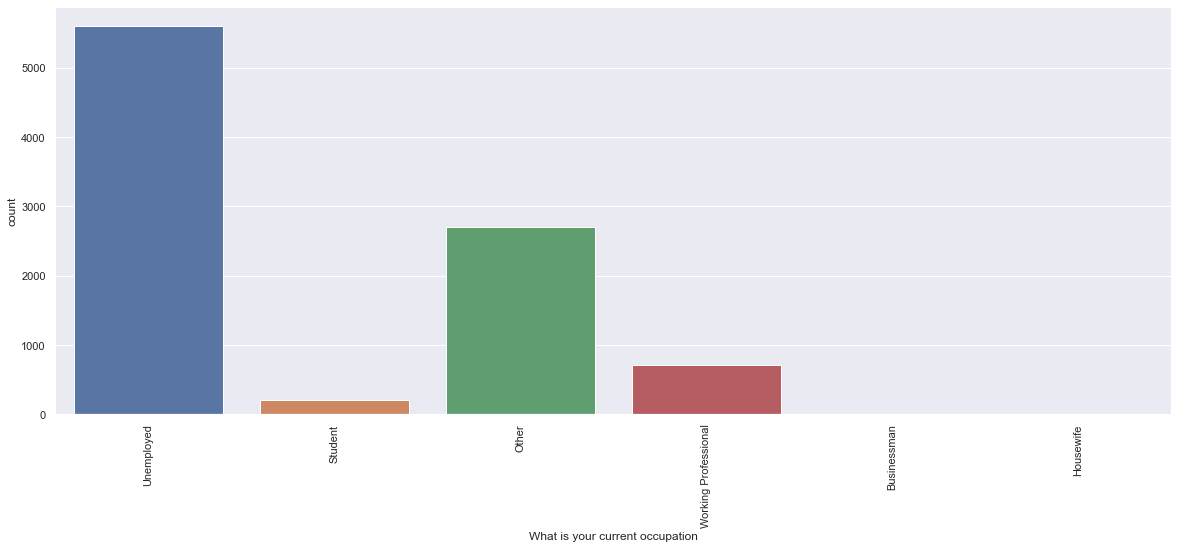

In [36]:
fig, axs = plt.subplots(figsize = (20,7.5))
sns.countplot(Leads_DF['What is your current occupation'])
plt.xticks(rotation = 90)    

In [37]:
round(100*(Leads_DF.isnull().sum()/len(Leads_DF.index)), 2)

Lead Origin                                     0.0000 
Lead Source                                     0.3900 
Do Not Email                                    0.0000 
Do Not Call                                     0.0000 
Converted                                       0.0000 
TotalVisits                                     1.4800 
Total Time Spent on Website                     0.0000 
Page Views Per Visit                            1.4800 
Last Activity                                   1.1100 
Country                                         0.0000 
Specialization                                  0.0000 
What is your current occupation                 0.0000 
What matters most to you in choosing a course   29.3200
Search                                          0.0000 
Magazine                                        0.0000 
Newspaper Article                               0.0000 
X Education Forums                              0.0000 
Newspaper                                       

- Now we are left with 4 columns with less 2% of null values and 3 columns with double digit null values.

**8. 'What matters most to you in choosing a course ' Column** <br>
Now, we will see the 'What matters most to you in choosing a course' column and see what we could do with the null values.

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

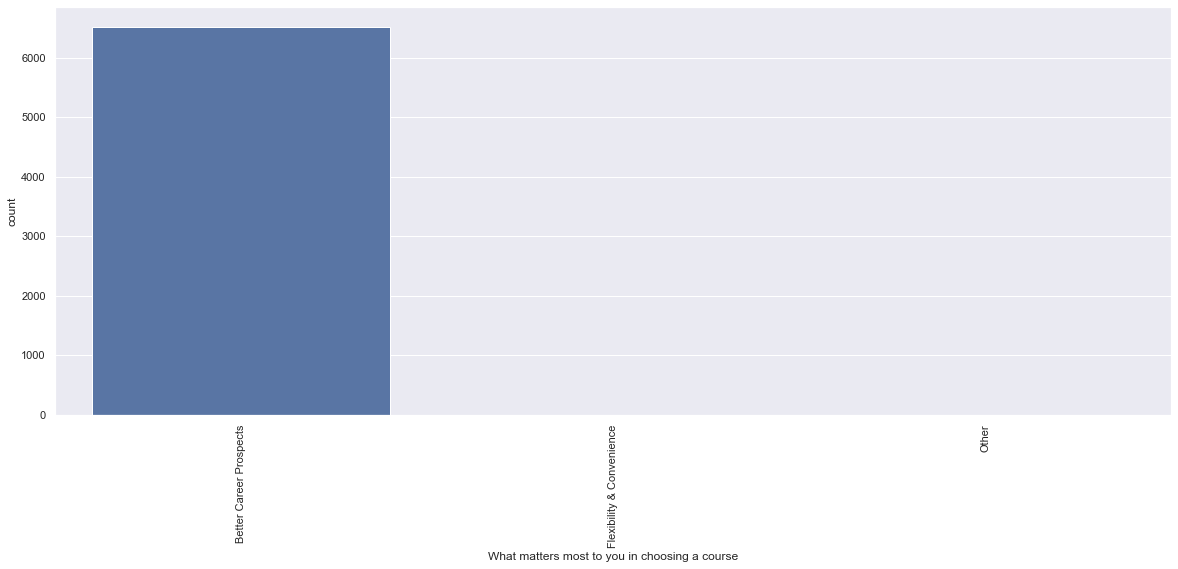

In [38]:
fig, axs = plt.subplots(figsize = (20,7.5))
sns.countplot(Leads_DF['What matters most to you in choosing a course'])
plt.xticks(rotation = 90)    

- From the above graph, almost all respondents are in the 'Better Career Prospects' category. It is safe to assume that all the respondents with a null value in this column would also want to avail online courses for better career prospects. Hence, we will replace all null values with the same for this column. 

In [39]:
Leads_DF['What matters most to you in choosing a course'] = Leads_DF['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [40]:
round(100*(Leads_DF.isnull().sum()/len(Leads_DF.index)), 2)

Lead Origin                                     0.0000 
Lead Source                                     0.3900 
Do Not Email                                    0.0000 
Do Not Call                                     0.0000 
Converted                                       0.0000 
TotalVisits                                     1.4800 
Total Time Spent on Website                     0.0000 
Page Views Per Visit                            1.4800 
Last Activity                                   1.1100 
Country                                         0.0000 
Specialization                                  0.0000 
What is your current occupation                 0.0000 
What matters most to you in choosing a course   0.0000 
Search                                          0.0000 
Magazine                                        0.0000 
Newspaper Article                               0.0000 
X Education Forums                              0.0000 
Newspaper                                       

- Now we are left with 4 columns with less 2% of null values and 2 columns with double digit null values.

**9. 'Tags' Column** <br>
Now, we will see the 'Tags' column and see what we could do with the null values.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

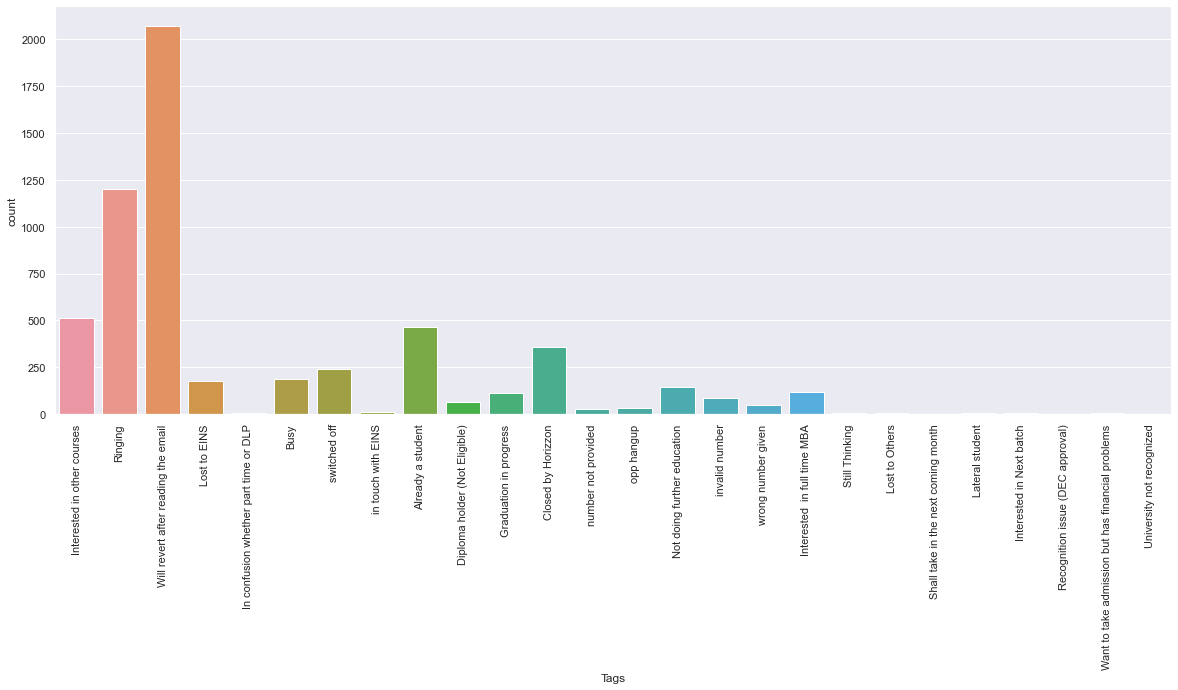

In [41]:
fig, axs = plt.subplots(figsize = (20,7.5))
sns.countplot(Leads_DF['Tags'])
plt.xticks(rotation = 90)    

In [42]:
Leads_DF['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                          513 
Already a student                                    465 
Closed by Horizzon                                   358 
switched off                                         240 
Busy                                                 186 
Lost to EINS                                         175 
Not doing further education                          145 
Interested  in full time MBA                         117 
Graduation in progress                               111 
invalid number                                       83  
Diploma holder (Not Eligible)                        63  
wrong number given                                   47  
opp hangup                                           33  
number not provided                                  27  
in touch with 

- From the graph and value counts above, we can make it out that the categories 'Will revert after reading the email' and 'Ringing' have the highest values. But for the null values, it will be difficult to impute them any of the categories under this column, because of the distribution of the categories, which suggests the respondents with null values could have any tag. Hence, we will impute them with a new columns called 'Not Specified'. 

In [43]:
Leads_DF['Tags' ] = Leads_DF['Tags' ].replace(np.nan, 'Not Specified')

In [44]:
round(100*(Leads_DF.isnull().sum()/len(Leads_DF.index)), 2)

Lead Origin                                     0.0000 
Lead Source                                     0.3900 
Do Not Email                                    0.0000 
Do Not Call                                     0.0000 
Converted                                       0.0000 
TotalVisits                                     1.4800 
Total Time Spent on Website                     0.0000 
Page Views Per Visit                            1.4800 
Last Activity                                   1.1100 
Country                                         0.0000 
Specialization                                  0.0000 
What is your current occupation                 0.0000 
What matters most to you in choosing a course   0.0000 
Search                                          0.0000 
Magazine                                        0.0000 
Newspaper Article                               0.0000 
X Education Forums                              0.0000 
Newspaper                                       

- Now we are left with 4 columns with less 2% of null values and 1 column with double digit null values.

**10. 'City' Column** <br>
Now, we will see the 'Tags' column and see what we could do with the null values.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

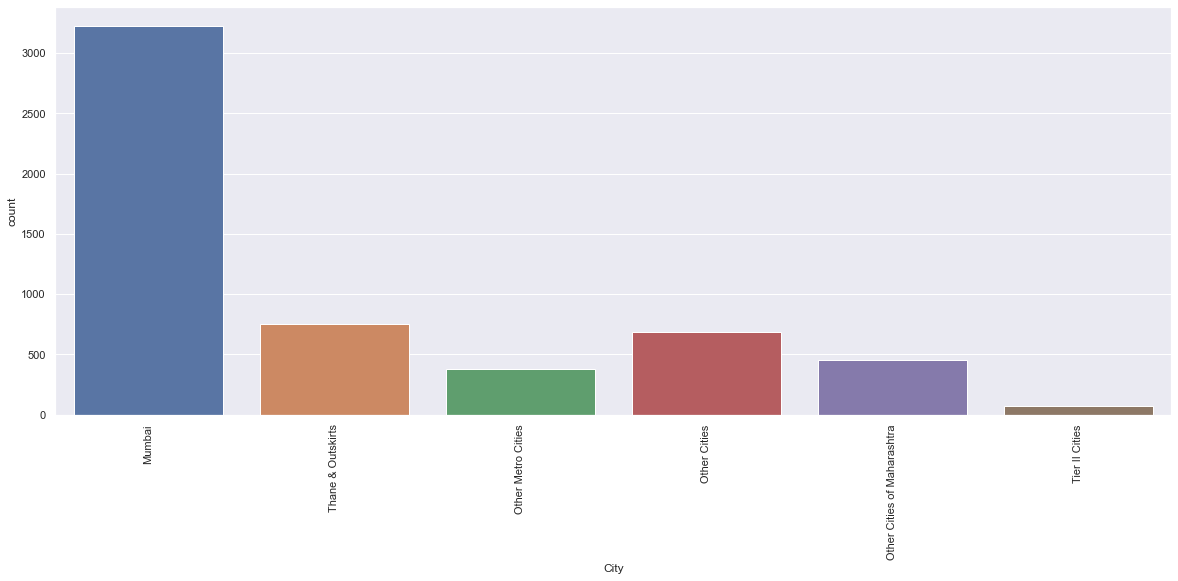

In [45]:
fig, axs = plt.subplots(figsize = (20,7.5))
sns.countplot(Leads_DF['City'])
plt.xticks(rotation = 90)    

In [46]:
Leads_DF['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts              752 
Other Cities                   686 
Other Cities of Maharashtra    457 
Other Metro Cities             380 
Tier II Cities                 74  
Name: City, dtype: int64

- From the above graph and value counts for the 'City' column, it is clear that the frequency for the category 'Mumbai' is highest. But, again, it is impossible to be assume that all the respondents with null values are from the category with the highest frequency i.e. 'Mumbai'. Hence, going by the distribution of the categories, which is decent, and by no means is majorly in the category with the highest frequency, we will impute the null values with 'Other Cities'. 

In [47]:
Leads_DF['City' ] = Leads_DF['City' ].replace(np.nan, 'Other Cities')

In [48]:
round(100*(Leads_DF.isnull().sum()/len(Leads_DF.index)), 2)

Lead Origin                                     0.0000
Lead Source                                     0.3900
Do Not Email                                    0.0000
Do Not Call                                     0.0000
Converted                                       0.0000
TotalVisits                                     1.4800
Total Time Spent on Website                     0.0000
Page Views Per Visit                            1.4800
Last Activity                                   1.1100
Country                                         0.0000
Specialization                                  0.0000
What is your current occupation                 0.0000
What matters most to you in choosing a course   0.0000
Search                                          0.0000
Magazine                                        0.0000
Newspaper Article                               0.0000
X Education Forums                              0.0000
Newspaper                                       0.0000
Digital Ad

- Now we are left with 4 columns with less 2% of null values.

**11. Columns with less than 2% null values** <br>
We see from the percentage of null values above, that 4 columns, 'Lead Source', 'TotalVisits' 'Page Views Per Visit' and 'Last Activity' have null values less than 2%. So, by dropping the rows having these null values would be a good idea has the number of rows dropped would not adversly affect the quality of the dataset as the number of rows being dropped would be quite small compared to all the rows in the dataset. Hence, we shall proceed to do the same.   

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text major ticklabel objects>)

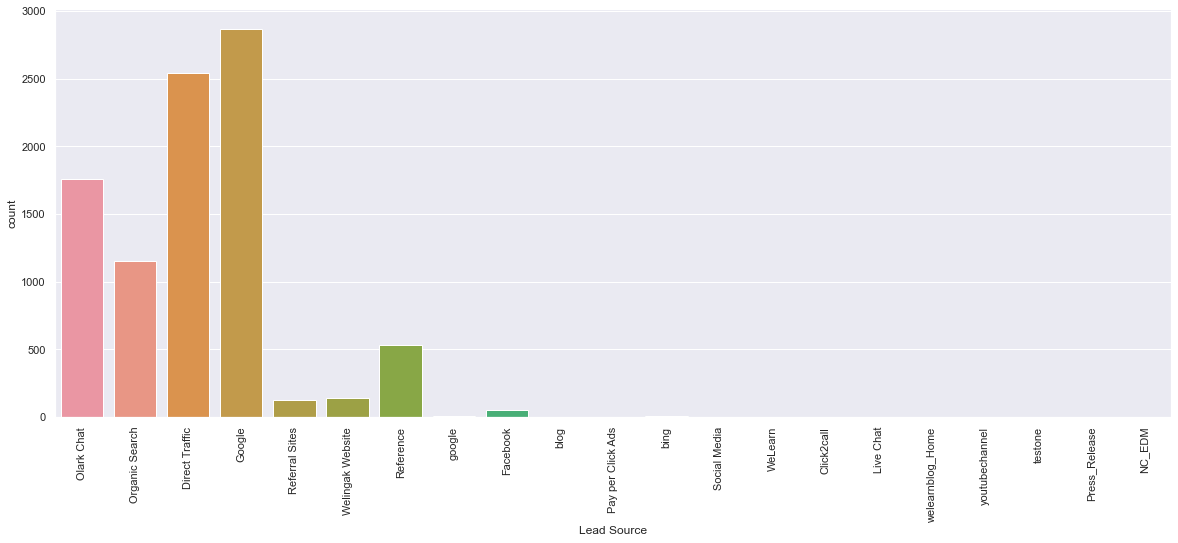

In [49]:
fig, axs = plt.subplots(figsize = (20,7.5))
sns.countplot(Leads_DF['Lead Source'])
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

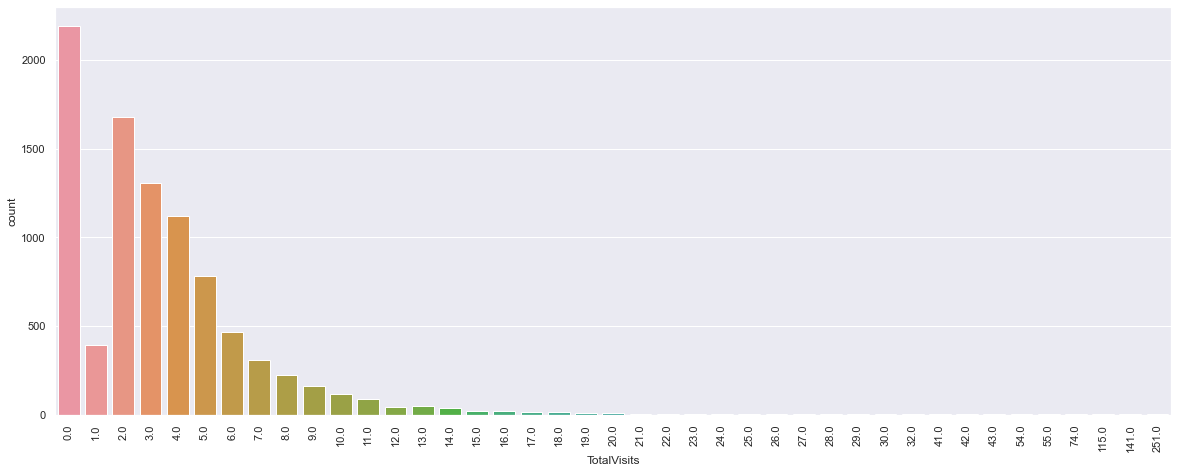

In [50]:
fig, axs = plt.subplots(figsize = (20,7.5))
sns.countplot(Leads_DF['TotalVisits'])
plt.xticks(rotation = 90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113]),
 <a list of 114 Text major ticklabel objects>)

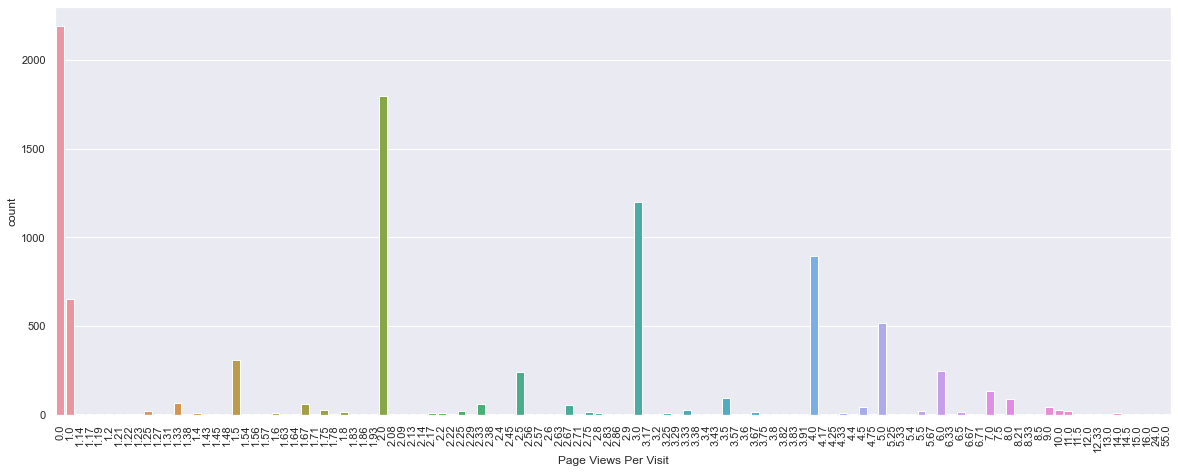

In [51]:
fig, axs = plt.subplots(figsize = (20,7.5))
sns.countplot(Leads_DF['Page Views Per Visit'])
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

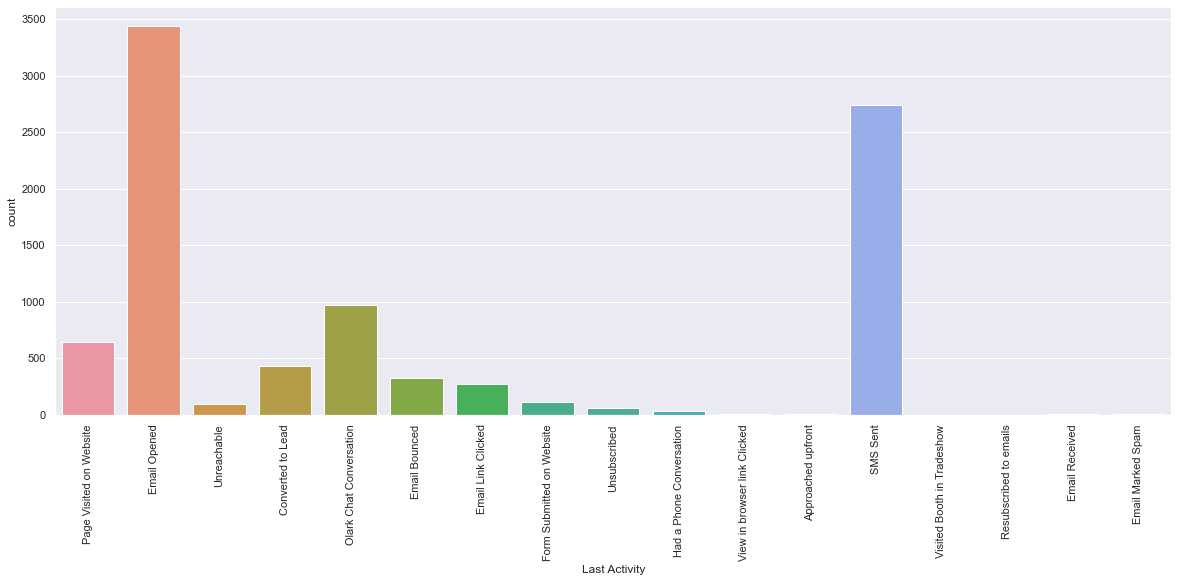

In [52]:
fig, axs = plt.subplots(figsize = (20,7.5))
sns.countplot(Leads_DF['Last Activity'])
plt.xticks(rotation = 90)

In [53]:
Leads_DF.dropna(inplace = True)

In [54]:
round(100*(Leads_DF.isnull().sum()/len(Leads_DF.index)), 2)

Lead Origin                                     0.0000
Lead Source                                     0.0000
Do Not Email                                    0.0000
Do Not Call                                     0.0000
Converted                                       0.0000
TotalVisits                                     0.0000
Total Time Spent on Website                     0.0000
Page Views Per Visit                            0.0000
Last Activity                                   0.0000
Country                                         0.0000
Specialization                                  0.0000
What is your current occupation                 0.0000
What matters most to you in choosing a course   0.0000
Search                                          0.0000
Magazine                                        0.0000
Newspaper Article                               0.0000
X Education Forums                              0.0000
Newspaper                                       0.0000
Digital Ad

- Hence, from the above null values table, we can conclude that there are no null values in the dataset anymore.

**Inference** <br>
By conducting the above testing procedures as part of the data cleaning step, we can conclude that no other data testing activities and subsequent data cleaning activities are required.

## Step-3: Visualising the Dataset

We visualized the dataset by conducting the univariate analysis under the null values treatment section of the Step-2 of the logistics regression process. Now, we will proceed with the bi-variate analysis. We will also drop any columns in this process which are redundant and would not contribute in the further logistic regression process. 

**Bivariate Analysis** <br>
We will conduct the bivariate analysis based on the converted column, which is incidently our target variable and will indicate whether a lead has converted into a customer (denoted by 1 in 'Converted' column) or not (denoted by 0 in 'Converted' column). 

In [55]:
Converted = (sum(Leads_DF['Converted'])/len(Leads_DF['Converted'].index))*100
Converted

37.85541106458012

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

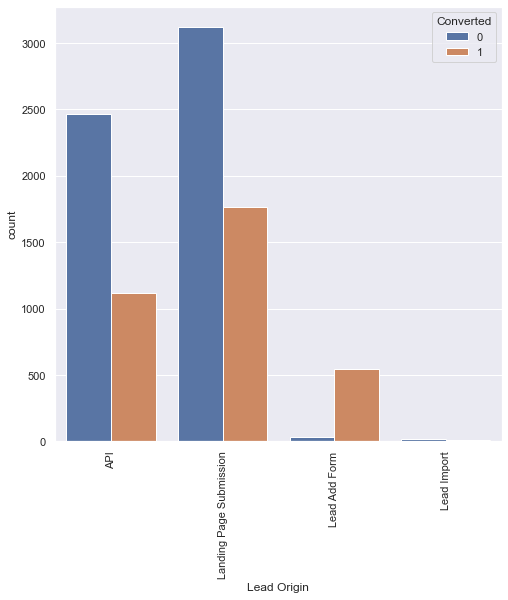

In [56]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = Leads_DF)
xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text major ticklabel objects>)

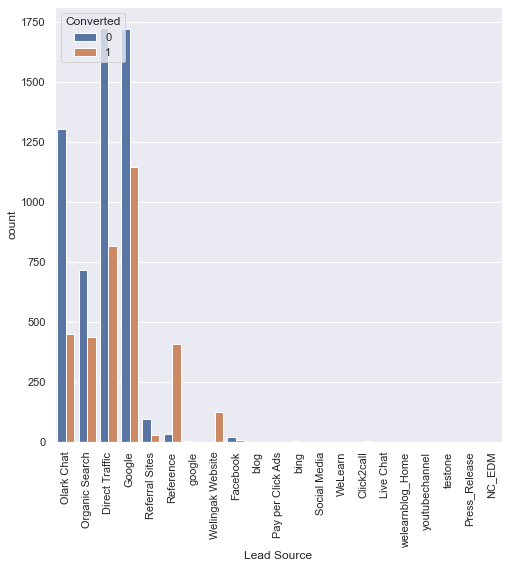

In [57]:
sns.countplot(x = "Lead Source", hue = "Converted", data = Leads_DF)
xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

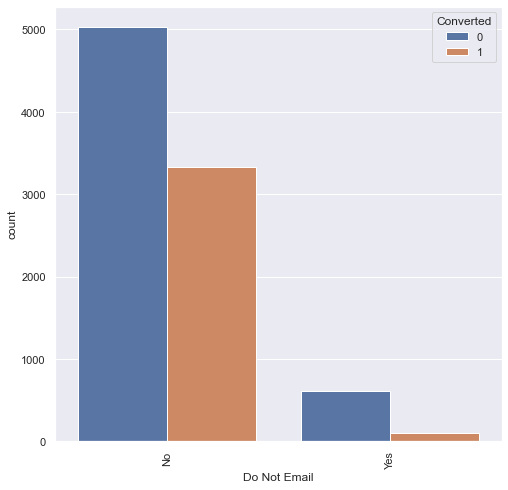

In [58]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = Leads_DF)
xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

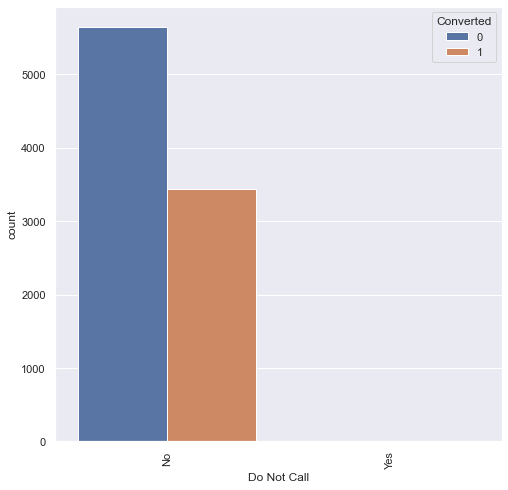

In [59]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = Leads_DF)
xticks(rotation = 90)

In [60]:
Leads_DF['Do Not Call'].value_counts()

No     9072
Yes    2   
Name: Do Not Call, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

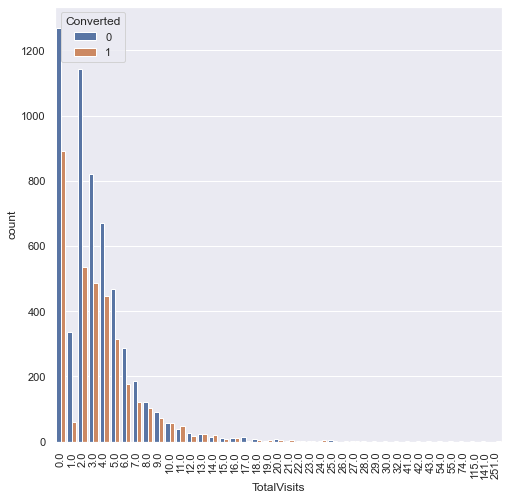

In [61]:
sns.countplot(x = "TotalVisits", hue = "Converted", data = Leads_DF)
xticks(rotation = 90)

In [62]:
Leads_DF['TotalVisits'].value_counts()

0.0000      2161
2.0000      1679
3.0000      1306
4.0000      1120
5.0000      783 
6.0000      466 
1.0000      395 
7.0000      309 
8.0000      224 
9.0000      164 
10.0000     114 
11.0000     86  
13.0000     48  
12.0000     45  
14.0000     36  
16.0000     21  
15.0000     18  
17.0000     16  
18.0000     15  
20.0000     12  
19.0000     9   
23.0000     6   
21.0000     6   
27.0000     5   
24.0000     5   
25.0000     5   
22.0000     3   
28.0000     2   
29.0000     2   
26.0000     2   
251.0000    1   
74.0000     1   
30.0000     1   
141.0000    1   
54.0000     1   
41.0000     1   
115.0000    1   
43.0000     1   
42.0000     1   
32.0000     1   
55.0000     1   
Name: TotalVisits, dtype: int64

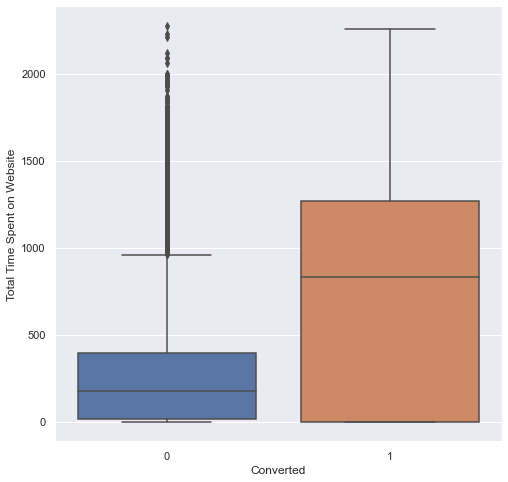

In [63]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = Leads_DF)

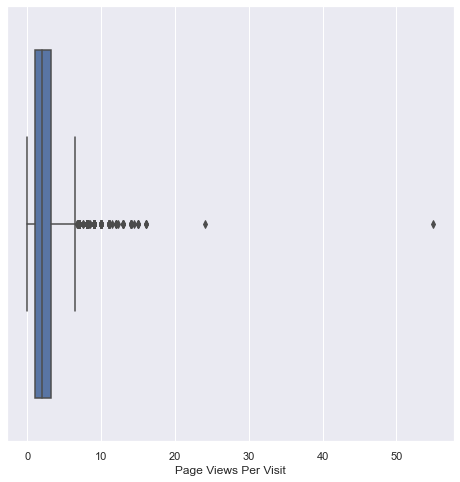

In [64]:
sns.boxplot(x = "Page Views Per Visit", hue = "Converted", data = Leads_DF)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

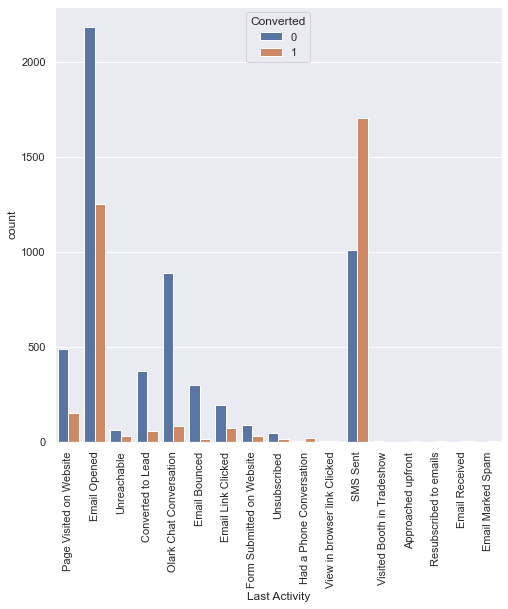

In [65]:
sns.countplot(x = "Last Activity", hue = "Converted", data = Leads_DF)
xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 <a list of 38 Text major ticklabel objects>)

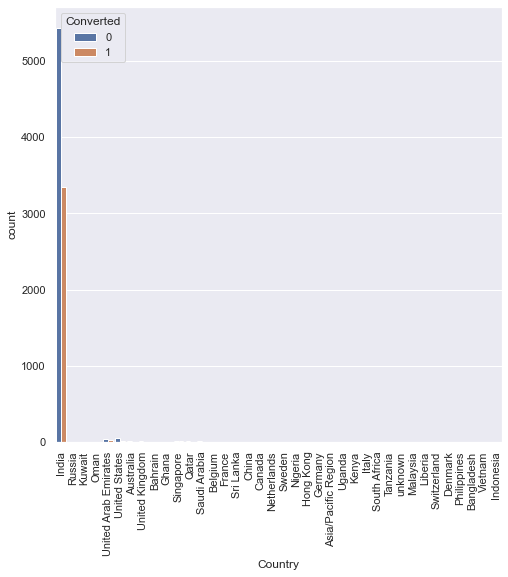

In [66]:
sns.countplot(x = "Country", hue = "Converted", data = Leads_DF)
xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text major ticklabel objects>)

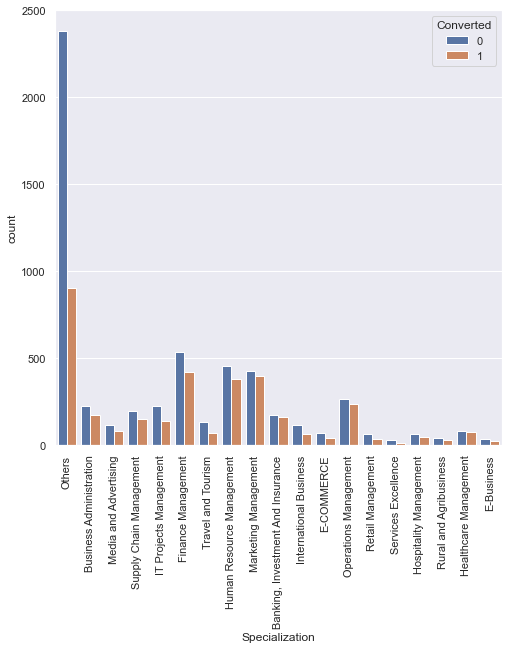

In [67]:
sns.countplot(x = "Specialization", hue = "Converted", data = Leads_DF)
xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

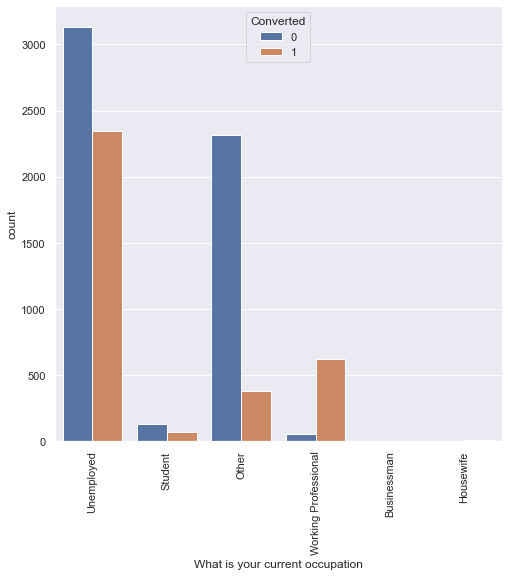

In [68]:
sns.countplot(x = "What is your current occupation", hue = "Converted", data = Leads_DF)
xticks(rotation = 90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

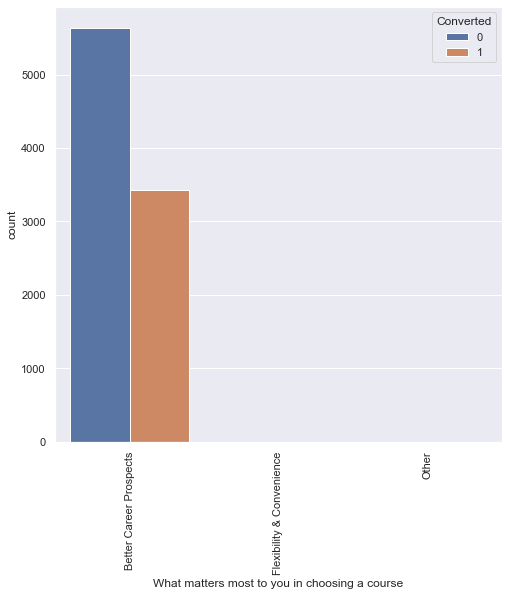

In [69]:
sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = Leads_DF)
xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

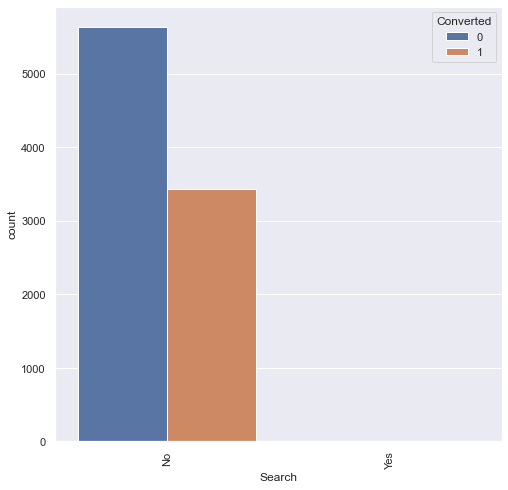

In [70]:
sns.countplot(x = "Search", hue = "Converted", data = Leads_DF)
xticks(rotation = 90)

(array([0]), <a list of 1 Text major ticklabel objects>)

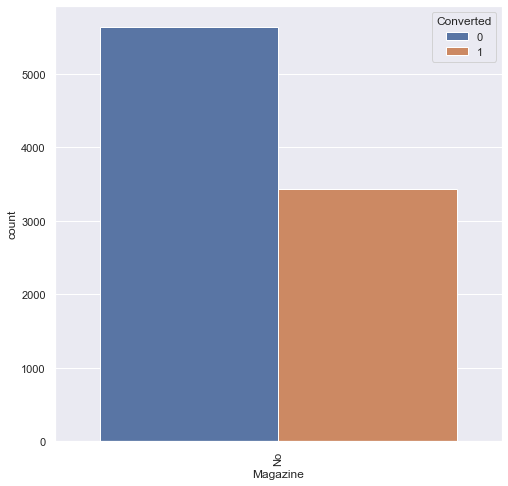

In [71]:
sns.countplot(x = "Magazine", hue = "Converted", data = Leads_DF)
xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

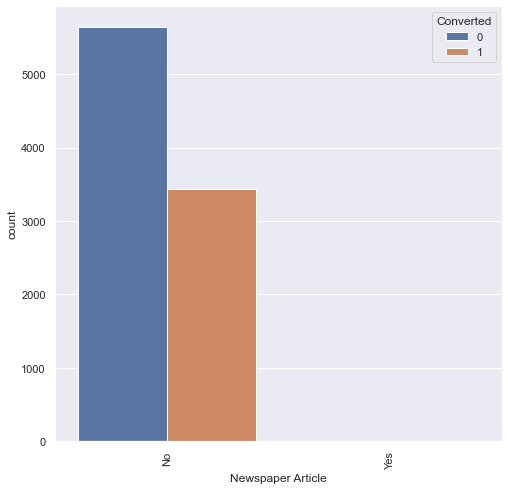

In [72]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = Leads_DF)
xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

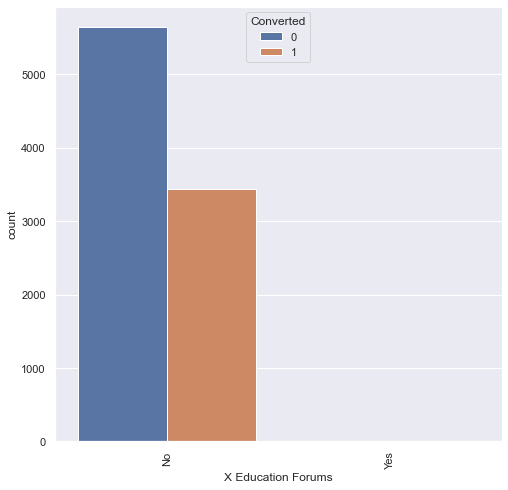

In [73]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = Leads_DF)
xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

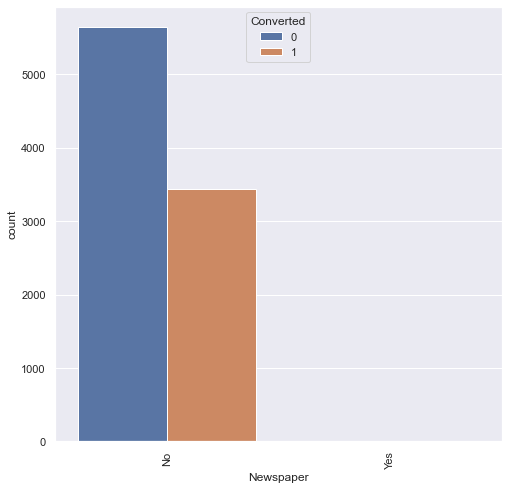

In [74]:
sns.countplot(x = "Newspaper", hue = "Converted", data = Leads_DF)
xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

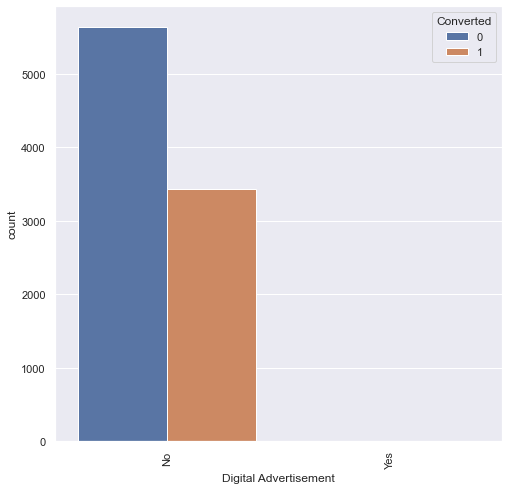

In [75]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = Leads_DF)
xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

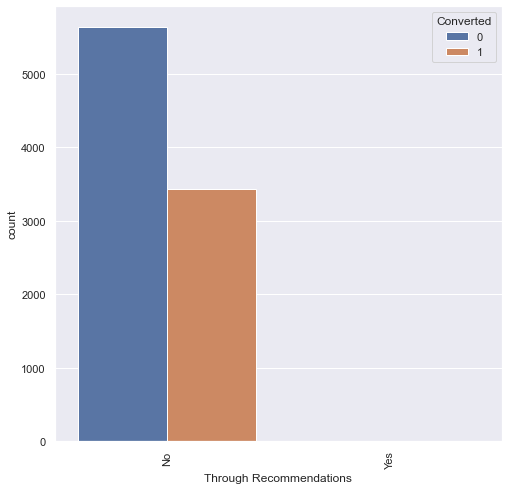

In [76]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = Leads_DF)
xticks(rotation = 90)

(array([0]), <a list of 1 Text major ticklabel objects>)

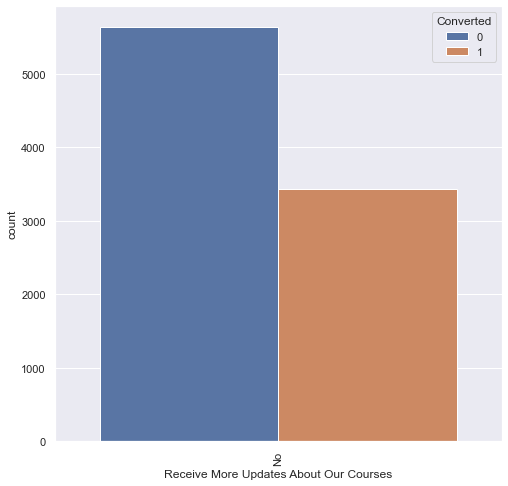

In [77]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = Leads_DF)
xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text major ticklabel objects>)

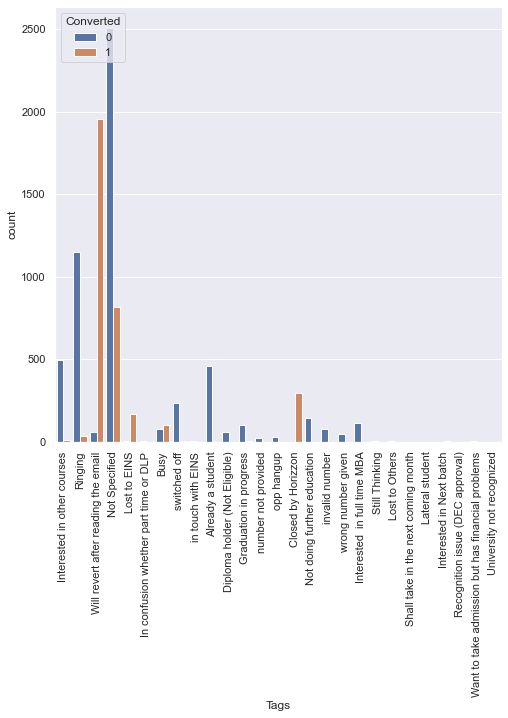

In [78]:
sns.countplot(x = "Tags", hue = "Converted", data = Leads_DF)
xticks(rotation = 90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

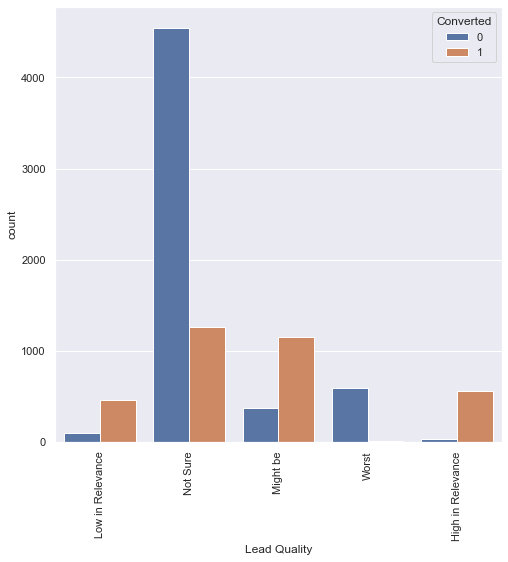

In [79]:
sns.countplot(x = "Lead Quality", hue = "Converted", data = Leads_DF)
xticks(rotation = 90)

(array([0]), <a list of 1 Text major ticklabel objects>)

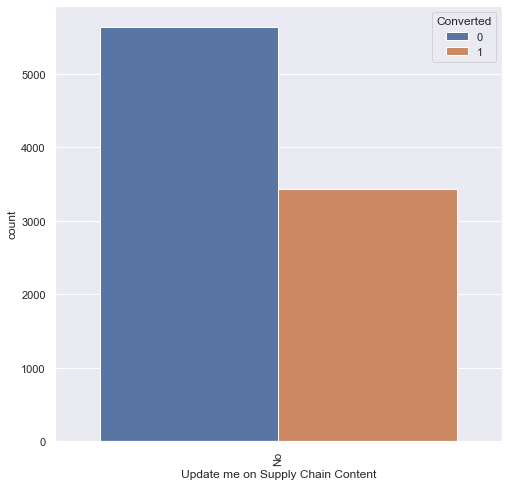

In [80]:
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = Leads_DF)
xticks(rotation = 90)

(array([0]), <a list of 1 Text major ticklabel objects>)

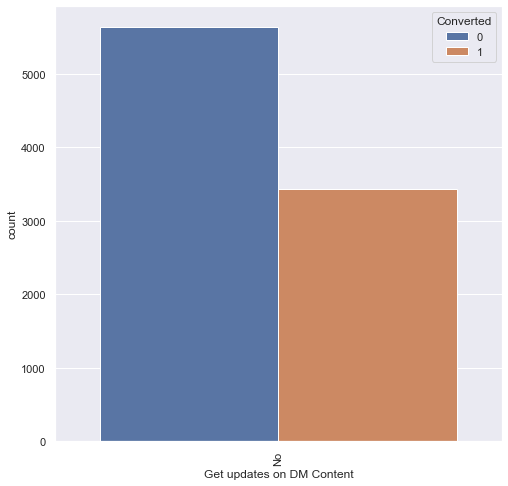

In [81]:
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = Leads_DF)
xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

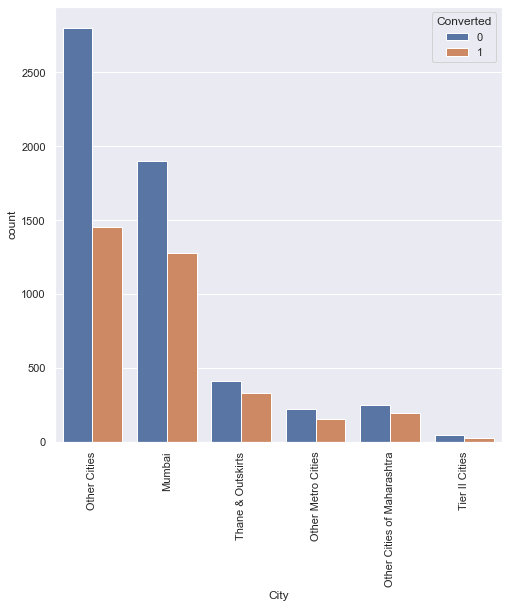

In [82]:
sns.countplot(x = "City", hue = "Converted", data = Leads_DF)
xticks(rotation = 90)

(array([0]), <a list of 1 Text major ticklabel objects>)

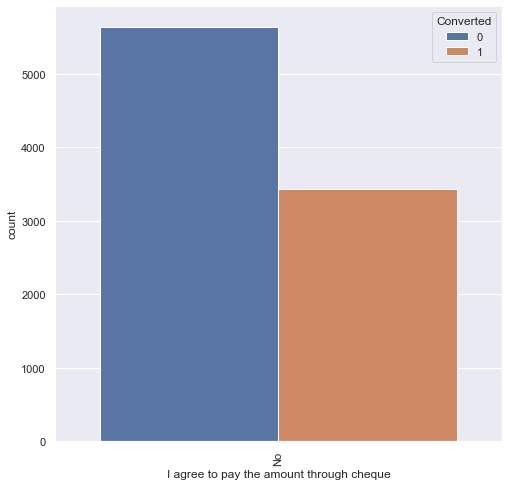

In [83]:
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = Leads_DF)
xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

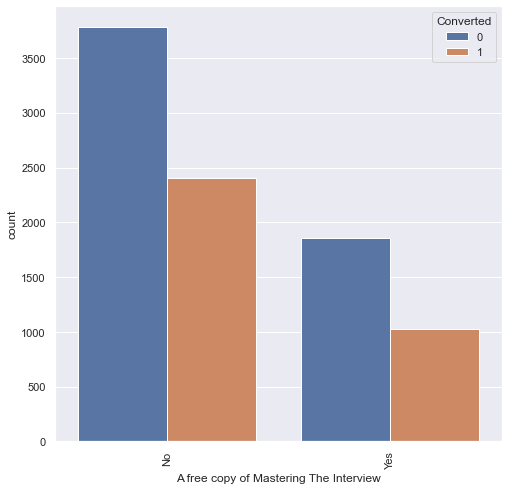

In [84]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = Leads_DF)
xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

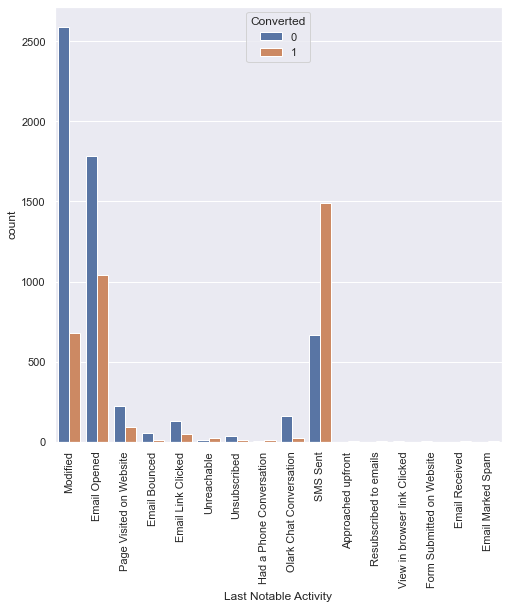

In [85]:
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = Leads_DF)
xticks(rotation = 90)

In [86]:
len(Leads_DF.columns)

29

- From the above bivariate analysis of each column with the 'Converted' column, we find a number of columns which do not contribute any information to the model. Also, some of these columns have very high values for one category of the column. Hence, we can drop all these columns.    

In [87]:
Leads_DF = Leads_DF.drop(['What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [88]:
len(Leads_DF.columns)

15

In [89]:
Leads_DF.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Lead Quality', 'City',
       'Last Notable Activity'],
      dtype='object')

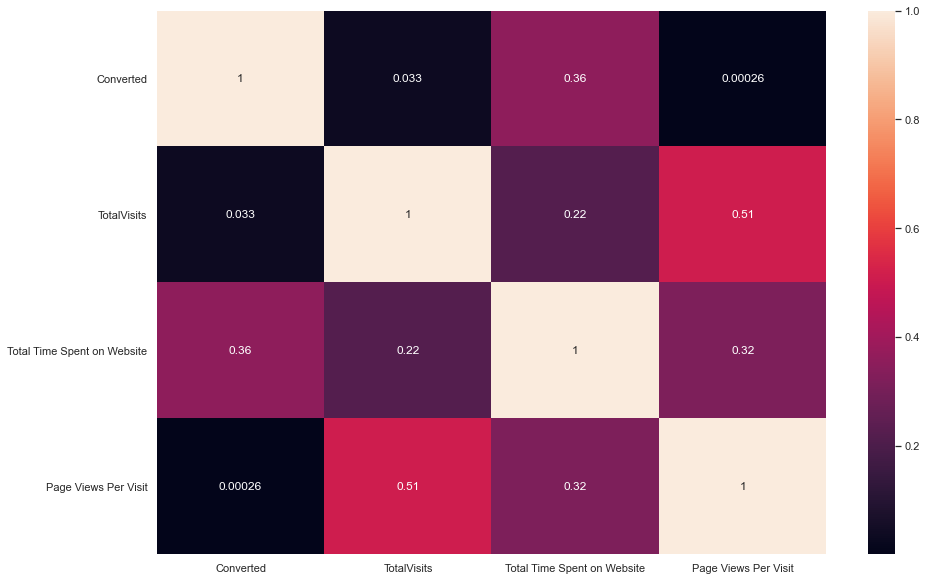

In [90]:
plt.figure(figsize = (15,10))        
CountryAnalysis_heatmap = sns.heatmap(Leads_DF.corr(),annot = True)

## Step-4: Data Preparation

**Outlier Treatment** <br>
Now, we shall proceed to find outliers in the dataset and find a solution as to how much of the outliers are we going to omit, by conducting a univariate analysis on the numerical columns of the dataset, in the form of boxplots.

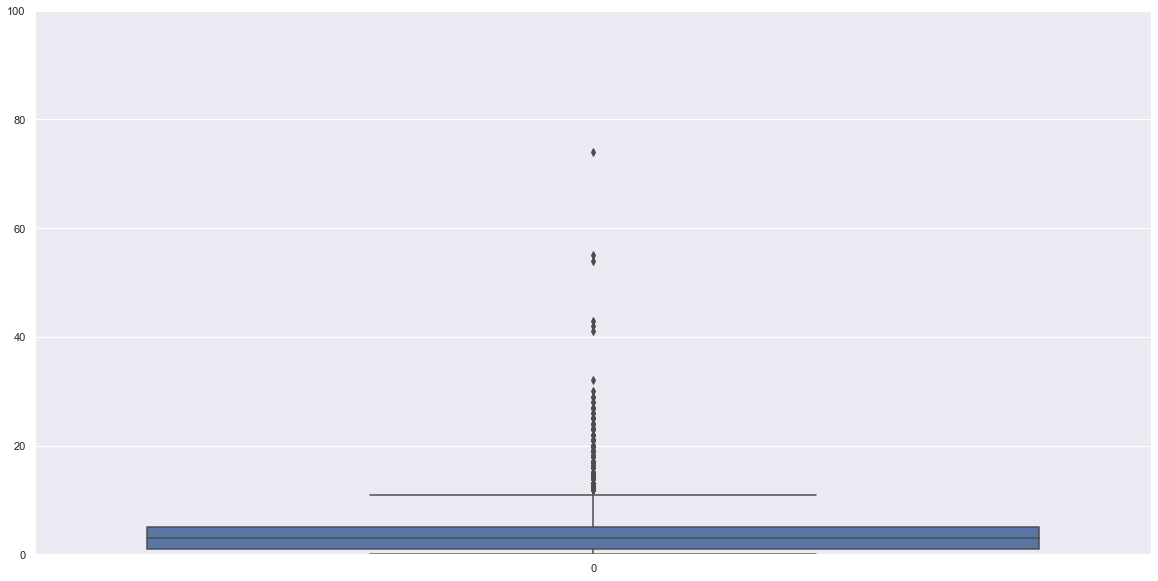

In [91]:
fig = plt.figure(figsize = (20,10))
plt.ylim(0, 100)
plt.xlim()
sns.boxplot(data=Leads_DF['TotalVisits'])

In [92]:
Leads_DF['TotalVisits'].describe()

count   9074.0000
mean    3.4560   
std     4.8588   
min     0.0000   
25%     1.0000   
50%     3.0000   
75%     5.0000   
max     251.0000 
Name: TotalVisits, dtype: float64

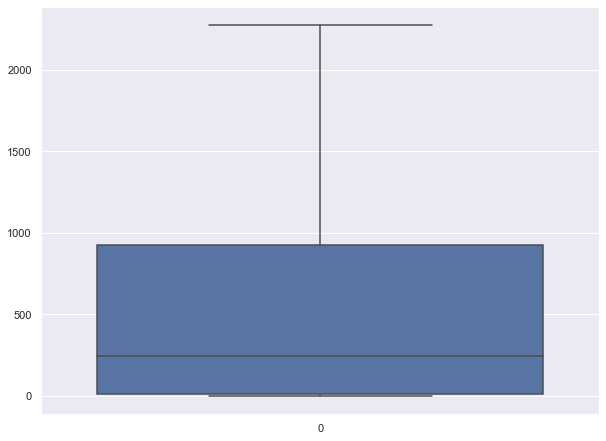

In [93]:
fig = plt.figure(figsize = (10,7.5))
sns.boxplot(data=Leads_DF['Total Time Spent on Website'])

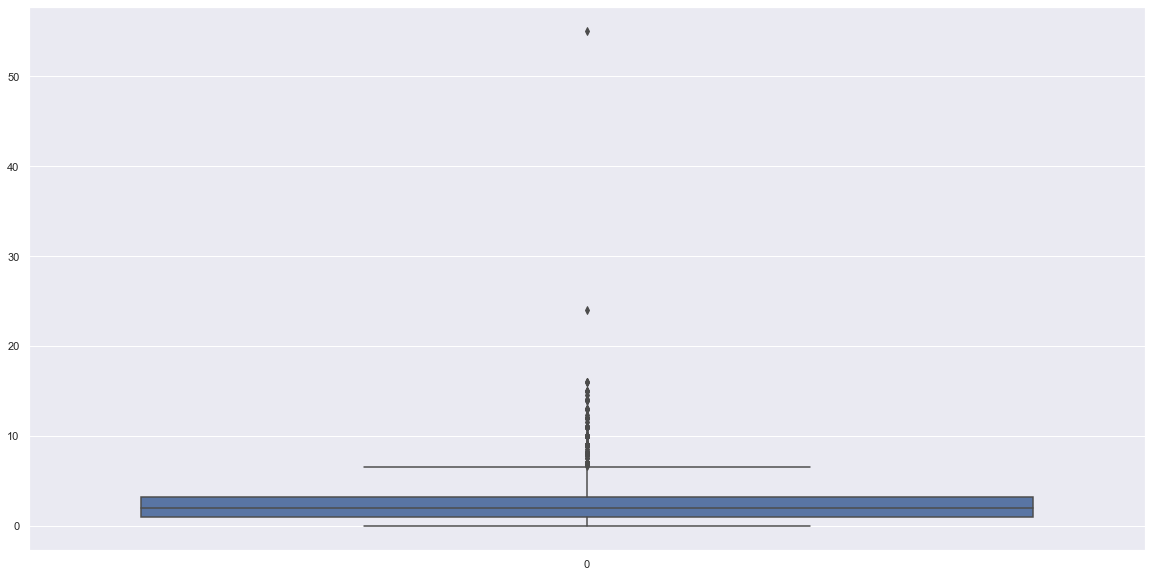

In [94]:
fig = plt.figure(figsize = (20,10))
sns.boxplot(data=Leads_DF['Page Views Per Visit'])

In [95]:
Leads_DF.shape

(9074, 15)

In [96]:
Columns = ['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']

for i in Columns:
    q1 = Leads_DF[i].quantile(0.01)
    q4 = Leads_DF[i].quantile(0.99)
    Leads_DF = Leads_DF[(Leads_DF[i]>=q1) &(Leads_DF[i]<=q4)]

In [97]:
Leads_DF.shape

(8834, 15)

In [98]:
Leads_DF.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0000,0,0.0000,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Other Cities,Modified
1,API,Organic Search,No,No,0,5.0000,674,2.5000,Email Opened,Others,Unemployed,Ringing,Not Sure,Other Cities,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0000,1532,2.0000,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0000,305,1.0000,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,No,No,1,2.0000,1428,1.0000,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


**Converting binary variables from Yes/No to 1/0** <br>
By observing the dataset above, we find two columns, 'Do Not Email' and 'Do Not Call', have a Yes/No value attached to it. Hence, in the interest of the logtic regression model, we will convert these values to 1/0.  

In [99]:
Leads_DF_BinaryList =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

Leads_DF[Leads_DF_BinaryList] = Leads_DF[Leads_DF_BinaryList].apply(binary_map)

In [100]:
Leads_DF.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0000,0,0.0000,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Other Cities,Modified
1,API,Organic Search,0,0,0,5.0000,674,2.5000,Email Opened,Others,Unemployed,Ringing,Not Sure,Other Cities,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0000,1532,2.0000,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0000,305,1.0000,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,0,0,1,2.0000,1428,1.0000,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


- From the head of the dataframe above, we see the new values, 1/0, have been assigned to the two columns.  

**Creating dummy variables for columns with multiple levels** <br>
We see that there 9 columns with multiples levels, hence, for the interest of the logistic regression model, we create dummy variables for each of them and drop the first columns created for each column. 

In [101]:
Leads_DF_Dummies = pd.get_dummies(Leads_DF[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
Leads_DF_Dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not Specified,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0

We will proceed to add these newly created columns to the main dataframe. 

In [102]:
Leads_DF = pd.concat([Leads_DF, Leads_DF_Dummies], axis=1)
Leads_DF.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not Specified,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0000,0,0.0000,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Other Cities,Modified,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

- We from the above datadrame that the dummy variables have been added. 

We wil proceed to drop the columns from which the dummy variables were created as they are of no use in the further process of logistic regression modeling.

In [103]:
Leads_DF = Leads_DF.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)
Leads_DF.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not Specified,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0000,0,0.0000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0000,674,2.5000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0

- We see from the above dataframe that the unnecessary columns have been dropped. 

**Inference** <br>
We have performed the necessary data preparation steps and can proceed to the model building stage. 

## Step-5: Model Building <br>

We will begin our model building process by splitting the dataset based on two datasets X and Y, where the X dataset has all the columns except 'Converted' and Y dataset will have only the column 'Converted', which is the target variable. These two datasets will be further divided into train and tests for each, as part of the model building proces. We will also be rescaling the values for the X train dataset and continue withe the logistic regression modeling process. 

**5.1 Splitting the dataset into X and y dataframes**

In [104]:
from sklearn.model_selection import train_test_split

X = Leads_DF.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not Specified,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0000,0,0.0000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0000,674,2.5000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0

In [105]:
y = Leads_DF['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

**5.2 Splitting X and y dataframes into train and test dataset for each of them**

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

**5.3 Rescaling the X train dataset**

In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not Specified,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
53,0,0,0.9783,-0.3407,-0.4142,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1929,0,0,0.6331,-0.4740,1.4394,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,

We will check the lead conversion rate again.

In [108]:
(sum(Leads_DF['Converted'])/len(Leads_DF['Converted'].index))*100

37.457550373556714

- We see the lead conversion rate is around 38% 

**5.4 Model Building: First Model** 

In [109]:
import statsmodels.api as sm

In [110]:
Leads_DF_FirstModel = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
Leads_DF_FirstModel.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6183
Model:                            GLM   Df Residuals:                     6072
Model Family:                Binomial   Df Model:                          110
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -967.89
Date:                Sat, 05 Dec 2020   Deviance:                       1935.8
Time:                        11:52:08   Pearson chi2:                 1.13e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     37.2933   1.41e+05      0.000      1.000   -2.76e+05    2.77e+05
Do Not Email                                              -0.8154      0.339     -2.403      0.016      -1.481      -0.150
Do Not Call                                               21.5045   8.39e+04      0.000      1.000   -1.64e+05    1.65e+05
TotalVisits                                                0.2471      0.092      2.683      0.007       0.067       0.428
Total Time Spent on Website                                1.1604      0.072     16.111      0.000       1.019       1.302
Page Views Per Visit                                      -0.2737      0.108     -2.531      0.011      -0.486      -0.062
Lead Origin_Landing Page Submission                        0.0201      0.276      0.073      0.942      -0.522       0.562
Lead Origin_Lead Add Form                                 -1.5996      1.578     -1.014      0.311      -4.693       1.494
Lead Origin_Lead Import                                   24.3698   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Direct Traffic                               -22.7733   5.25e+04     -0.000      1.000   -1.03e+05    1.03e+05
Lead Source_Facebook                                     -46.9648   1.41e+05     -0.000      1.000   -2.77e+05    2.77e+05
Lead Source_Google                                       -22.4049   5.25e+04     -0.000      1.000   -1.03e+05    1.03e+05
Lead Source_Live Chat                                     -0.6906   1.41e+05  -4.91e-06      1.000   -2.76e+05    2.76e+05
Lead Source_NC_EDM                                         2.9257   1.43e+05   2.05e-05      1.000    -2.8e+05     2.8e+05
Lead Source_Olark Chat                                   -21.2846   5.25e+04     -0.000      1.000   -1.03e+05    1.03e+05
Lead Source_Organic Search                               -22.5966   5.25e+04     -0.000      1.000   -1.03e+05    1.03e+05
Lead Source_Pay per Click Ads                            -40.6149    1.4e+05     -0.000      1.000   -2.75e+05    2.75e+05
Lead Source_Press_Release                                -37.7574   1.42e+05     -0.000      1.000   -2.78e+05    2.78e+05
Lead Source_Reference                                    -19.4468   5.25e+04     -0.000      1.000   -1.03e+05    1.03e+05
Lead Source_Referral Sites                               -22.1350   5.25e+04     -0.000      1.000   -1.03e+05    1.03e+05
Lead Source_Social Media                                 -40.7646   1.42e+05     -0.000      1.000   -2.78e+05    2.78e+05
Lead Source_WeLearn                                       -2.3648   1.41e+05  -1.68e-05      1.000   -2.76e+05    2.76e+05
Lead Sou

## Step-6: Feature Selection Using RFE

**6.1 RFE Analysis**

In [111]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [112]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True,  True, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True, False, False, False, False,  True, False, False, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False])

In [113]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 9),
 ('Do Not Call', False, 65),
 ('TotalVisits', False, 52),
 ('Total Time Spent on Website', False, 6),
 ('Page Views Per Visit', False, 51),
 ('Lead Origin_Landing Page Submission', False, 76),
 ('Lead Origin_Lead Add Form', False, 4),
 ('Lead Origin_Lead Import', False, 88),
 ('Lead Source_Direct Traffic', False, 36),
 ('Lead Source_Facebook', False, 37),
 ('Lead Source_Google', False, 39),
 ('Lead Source_Live Chat', False, 92),
 ('Lead Source_NC_EDM', False, 19),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', False, 38),
 ('Lead Source_Pay per Click Ads', False, 94),
 ('Lead Source_Press_Release', False, 98),
 ('Lead Source_Reference', False, 43),
 ('Lead Source_Referral Sites', False, 72),
 ('Lead Source_Social Media', False, 93),
 ('Lead Source_WeLearn', False, 91),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 64),
 ('Lead Source_blog', False, 63),
 ('Lead Source_google', False, 70),
 ('Lead Source_test

In [114]:
col = X_train.columns[rfe.support_]

In [115]:
col

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Other', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Not Specified', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [116]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook',
       ...
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=102)

**6.2 StatsModel Assessment** <br>
We will conduct an assessment on the model by using the statsmodel feature. Base on this, we will check the P values of the columns and drop any column with a high P value with a threshold of 0.05 i.e. any column with a P value of more 0.05 will be dropped. After this, we will apply the probability values generated on y train dataset.

In [117]:
X_train_sm = sm.add_constant(X_train[col])
Leads_DF_SecondModel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
Res = Leads_DF_SecondModel.fit()
Res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6183
Model:                            GLM   Df Residuals:                     6167
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1196.7
Date:                Sat, 05 Dec 2020   Deviance:                       2393.3
Time:                        11:52:30   Pearson chi2:                 1.08e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.9375      0.210    -14.001      0.000      -3.349      -2.526
Lead Source_Welingak Website                      2.4656      0.744      3.316      0.001       1.008       3.923
Last Activity_SMS Sent                            2.0728      0.123     16.817      0.000       1.831       2.314
What is your current occupation_Other            -2.6079      0.147    -17.780      0.000      -2.895      -2.320
Tags_Busy                                         2.3141      0.286      8.103      0.000       1.754       2.874
Tags_Closed by Horizzon                           8.5486      0.745     11.472      0.000       7.088      10.009
Tags_Lateral student                             25.6328   4.47e+04      0.001      1.000   -8.77e+04    8.77e+04
Tags_Lost to EINS                                 9.6313      0.775     12.428      0.000       8.112      11.150
Tags_Not Specified                                3.4246      0.236     14.542      0.000       2.963       3.886
Tags_Ringing                                     -1.6390      0.296     -5.544      0.000      -2.218      -1.060
Tags_Will revert after reading the email          6.3488      0.263     24.110      0.000       5.833       6.865
Tags_switched off                                -2.2812      0.626     -3.646      0.000      -3.507      -1.055
Tags_wrong number given                         -21.2342    1.4e+04     -0.002      0.999   -2.75e+04    2.75e+04
Lead Quality_Worst                               -2.6940      0.813     -3.314      0.001      -4.287      -1.101
Last Notable Activity_Modified                   -1.5578      0.128    -12.177      0.000      -1.809      -1.307
Last Notable Activity_Olark Chat Conversation    -1.5878      0.457     -3.476      0.001      -2.483      -0.693
=================================================================================================================
"""

- We see that the column 'Tags_wrong number given' has a high P value of 0.999. Hence, we shall proceed to drop it. 

In [118]:
col1 = col.drop('Tags_wrong number given',1)

In [119]:
col1

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Other', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Not Specified', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Worst', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [120]:
X_train_sm = sm.add_constant(X_train[col1])
Leads_DF_SecondModel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
Res = Leads_DF_SecondModel.fit()
Res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6183
Model:                            GLM   Df Residuals:                     6168
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1199.2
Date:                Sat, 05 Dec 2020   Deviance:                       2398.5
Time:                        11:52:30   Pearson chi2:                 1.07e+04
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.0248      0.210    -14.392      0.000      -3.437      -2.613
Lead Source_Welingak Website                      2.4666      0.743      3.318      0.001       1.010       3.923
Last Activity_SMS Sent                            2.0586      0.123     16.759      0.000       1.818       2.299
What is your current occupation_Other            -2.6036      0.146    -17.784      0.000      -2.891      -2.317
Tags_Busy                                         2.4083      0.285      8.456      0.000       1.850       2.966
Tags_Closed by Horizzon                           8.6294      0.745     11.576      0.000       7.168      10.091
Tags_Lateral student                             23.7277   1.65e+04      0.001      0.999   -3.22e+04    3.23e+04
Tags_Lost to EINS                                 9.7028      0.775     12.521      0.000       8.184      11.222
Tags_Not Specified                                3.5120      0.236     14.901      0.000       3.050       3.974
Tags_Ringing                                     -1.5404      0.294     -5.232      0.000      -2.118      -0.963
Tags_Will revert after reading the email          6.4335      0.264     24.391      0.000       5.917       6.951
Tags_switched off                                -2.1817      0.625     -3.491      0.000      -3.407      -0.957
Lead Quality_Worst                               -2.6514      0.819     -3.238      0.001      -4.257      -1.046
Last Notable Activity_Modified                   -1.5503      0.128    -12.122      0.000      -1.801      -1.300
Last Notable Activity_Olark Chat Conversation    -1.5864      0.457     -3.474      0.001      -2.482      -0.691
=================================================================================================================
"""

- We see that the column 'Tags_wrong number given' has a high P value of 0.999. Hence, we shall proceed to drop it.

In [121]:
col2 = col1.drop('Tags_Lateral student',1)

In [122]:
col2

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Other', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Not Specified',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [123]:
X_train_sm = sm.add_constant(X_train[col2])
Leads_DF_SecondModel = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
Res = Leads_DF_SecondModel.fit()
Res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6183
Model:                            GLM   Df Residuals:                     6169
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1205.5
Date:                Sat, 05 Dec 2020   Deviance:                       2411.1
Time:                        11:52:31   Pearson chi2:                 1.07e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.9390      0.202    -14.540      0.000      -3.335      -2.543
Lead Source_Welingak Website                      2.4659      0.743      3.318      0.001       1.009       3.923
Last Activity_SMS Sent                            2.0799      0.123     16.973      0.000       1.840       2.320
What is your current occupation_Other            -2.6093      0.147    -17.808      0.000      -2.897      -2.322
Tags_Busy                                         2.3060      0.279      8.265      0.000       1.759       2.853
Tags_Closed by Horizzon                           8.5289      0.743     11.478      0.000       7.073       9.985
Tags_Lost to EINS                                 9.6166      0.774     12.431      0.000       8.100      11.133
Tags_Not Specified                                3.4178      0.228     14.962      0.000       2.970       3.866
Tags_Ringing                                     -1.6445      0.289     -5.695      0.000      -2.210      -1.079
Tags_Will revert after reading the email          6.3374      0.257     24.641      0.000       5.833       6.841
Tags_switched off                                -2.2870      0.622     -3.674      0.000      -3.507      -1.067
Lead Quality_Worst                               -2.7194      0.809     -3.360      0.001      -4.305      -1.133
Last Notable Activity_Modified                   -1.5323      0.127    -12.056      0.000      -1.781      -1.283
Last Notable Activity_Olark Chat Conversation    -1.5783      0.457     -3.457      0.001      -2.473      -0.684
=================================================================================================================
"""

- The P values of columns have a good reading and no other coumns need to be dropped on this parameter.  

**6.2.1 Getting the probability values on the y train dataset**

In [124]:
y_train_pred = Res.predict(X_train_sm)
y_train_pred[:10]

53     0.0250
1929   0.1062
3011   0.0022
3294   0.4874
3672   0.2586
1261   0.9935
6656   0.0756
7159   0.9958
2311   0.9810
5258   0.9677
dtype: float64

In [125]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.02502012, 0.10617018, 0.00220303, 0.48737206, 0.25856835,
       0.99346952, 0.07561298, 0.99584109, 0.98103606, 0.96765401])

In [126]:
y_train_pred_final = pd.DataFrame({'Leads Converted':y_train.values, 'Leads Conversion Probability':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final

,Leads Converted,Leads Conversion Probability,Prospect ID
0,0,0.0250,53
1,0,0.1062,1929
2,0,0.0022,3011
3,0,0.4874,3294
4,0,0.2586,3672
5,1,0.9935,1261
6,0,0.0756,6656
7,1,0.9958,7159
8,1,0.9810,2311
9,1,0.9677,5258


**6.3 Creating a new column 'Predicted'** <br>
We will create a new column called 'Predicted' with 1 as a value if the lead conversion probability is greater than 0.5, otherwise, we will assign a value of 0.

In [127]:
y_train_pred_final['Predicted'] = y_train_pred_final['Leads Conversion Probability'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Leads Converted,Leads Conversion Probability,Prospect ID,Predicted
0,0,0.0250,53,0
1,0,0.1062,1929,0
2,0,0.0022,3011,0
3,0,0.4874,3294,0
4,0,0.2586,3672,0


**6.4 Confusion Matrix**

In [128]:
from sklearn import metrics

In [129]:
confusion = metrics.confusion_matrix(y_train_pred_final['Leads Converted'], y_train_pred_final.Predicted)
print(confusion)

[[3737  140]
 [ 318 1988]]


**6.4.1 Checking the Accuracy**

In [130]:
print(metrics.accuracy_score(y_train_pred_final['Leads Converted'], y_train_pred_final.Predicted ))

0.9259259259259259


- The model has a very good accuracy score with a value of 0.92. 

**6.5 Checking VIFs**

In [131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [132]:
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Source_Welingak Website,1.1300
4,Tags_Closed by Horizzon,1.0600
6,Tags_Not Specified,1.0600
3,Tags_Busy,1.0500
10,Lead Quality_Worst,1.0400
11,Last Notable Activity_Modified,1.0100
5,Tags_Lost to EINS,1.0000
7,Tags_Ringing,0.4500
12,Last Notable Activity_Olark Chat Conversation,0.4300
2,What is your current occupation_Other,0.1100


- All variables have a good value of VIF. So we need not drop any columns and we can proceed with making predictions using this model only. 

**6.6 Metrics beyond simply accuracy** <br>
TP - True Positive, 
TN - True Negatives,
FP - False Positives,
FN - False Negatives

In [133]:
TP = confusion[1,1]  
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

**6.6.1 Sensitivity of the Model**

In [134]:
TP / float(TP+FN)

0.8620988725065047

**6.6.2 Specificity of the Model**

In [135]:
TN / float(TN+FP)

0.9638896053649729

**6.6.3 False Postive Rate**

In [136]:
FP/ float(TN+FP)

0.036110394635027084

**6.6.4 Positive Predictive Value** 

In [137]:
print (TP / float(TP+FP))

0.9342105263157895


**6.6.5 Negative Predictive Value**

In [138]:
print (TN / float(TN+ FN))

0.9215782983970406


## Step 7: Plotting the ROC Curve

In [139]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [140]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Leads Converted'], y_train_pred_final['Leads Conversion Probability'], drop_intermediate = False )

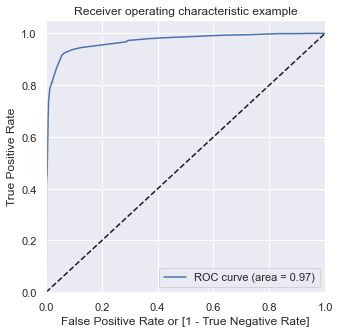

In [141]:
draw_roc(y_train_pred_final['Leads Converted'], y_train_pred_final['Leads Conversion Probability'])

## Step 8: Optimal Cutoff Point and Statistical Diagnosis<br>
Optimal cutoff probability is that probability where we get the balanced sensitivity and specificity.

**8.1 Creating columns with different probability cutoffs** 

In [142]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Leads Conversion Probability'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Leads Converted,Leads Conversion Probability,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.0250,53,0,1,0,0,0,0,0,0,0,0,0
1,0,0.1062,1929,0,1,1,0,0,0,0,0,0,0,0
2,0,0.0022,3011,0,1,0,0,0,0,0,0,0,0,0
3,0,0.4874,3294,0,1,1,1,1,1,0,0,0,0,0
4,0,0.2586,3672,0,1,1,1,0,0,0,0,0,0,0


**8.2 Calculating accuracy, sensitivity and specificity for various probability cutoffs**

In [143]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

**TP** - True Positive: confusion[1,1], **TN** - True Negatives: confusion[0,0], **FP** - False Positives: confusion[0,1], **FN** - False Negatives: confusion[1,0] 

In [144]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Leads Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

         prob  accuracy  sensi  speci
0.0000 0.0000 0.3730    1.0000 0.0000
0.1000 0.1000 0.8075    0.9705 0.7106
0.2000 0.2000 0.9198    0.9358 0.9102
0.3000 0.3000 0.9319    0.9219 0.9378
0.4000 0.4000 0.9332    0.9150 0.9440
0.5000 0.5000 0.9259    0.8621 0.9639
0.6000 0.6000 0.9259    0.8621 0.9639
0.7000 0.7000 0.9159    0.8109 0.9783
0.8000 0.8000 0.9164    0.8092 0.9801
0.9000 0.9000 0.8957    0.7350 0.9912


**8.3 Plotting the accuracy, sensitivity and specificity for various probabilities**

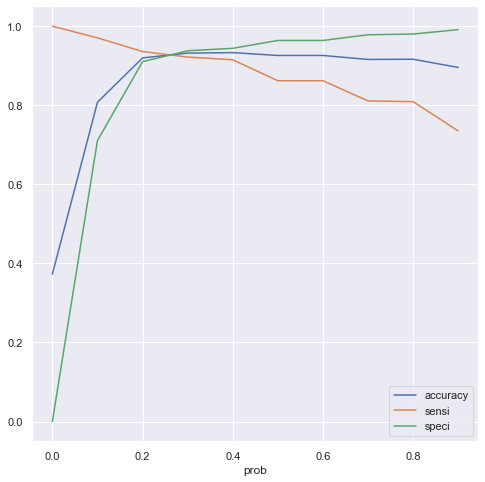

In [145]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- From the above graph, we can make out the optimum point for the cut-off probability is 0.25

**8.4 Assigning the optimum point for cut-off probability**

In [146]:
y_train_pred_final['Final Prediction'] = y_train_pred_final['Leads Conversion Probability'].map( lambda x: 1 if x > 0.25 else 0)
y_train_pred_final.head()

,Leads Converted,Leads Conversion Probability,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final Prediction
0,0,0.0250,53,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.1062,1929,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.0022,3011,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.4874,3294,0,1,1,1,1,1,0,0,0,0,0,1
4,0,0.2586,3672,0,1,1,1,0,0,0,0,0,0,0,1


**8.5 Accuracy and Confusion Matrix test with Final Prediction**  

**8.5.1 Accuracy of the model** <br>
We will proceed to check the accuracy of the model with the final predicions.

In [147]:
metrics.accuracy_score(y_train_pred_final['Leads Converted'], y_train_pred_final['Final Prediction'])

0.9205887109817241

- The accuracy of the model with the final prediction has a good value of 0.92.  

**8.5.2 Confusion Matrix of the model** <br>
We will proceed to find teh confusion matrix values along with sensitivity, specificity, false positive rate, positive predictive value and negative predictive value.   

In [148]:
confusion2 = metrics.confusion_matrix(y_train_pred_final['Leads Converted'], y_train_pred_final['Final Prediction'])
confusion2

array([[3538,  339],
       [ 152, 2154]], dtype=int64)

**TP** - True Positive: confusion[1,1], **TN** - True Negatives: confusion[0,0], **FP** - False Positives: confusion[0,1], **FN** - False Negatives: confusion[1,0]

In [149]:
TP = confusion2[1,1]  
TN = confusion2[0,0]
FP = confusion2[0,1] 
FN = confusion2[1,0] 

**8.5.2.1 Sensitivity**

In [150]:
 TP / float(TP+FN)

0.9340849956634866

**8.5.2.2 Specificity**

In [151]:
TN / float(TN+FP)

0.9125612587051845

**8.5.2.3 False Positive Rate**

In [152]:
print(FP/ float(TN+FP))

0.08743874129481558


**8.5.2.4 Positive Predictive Value** 

In [153]:
print (TP / float(TP+FP))

0.8640192539109507


**8.5.2.5 Negative Predictive Value**

In [154]:
print (TN / float(TN+ FN))

0.9588075880758807


**8.6 Precision and Recall**

We will look at the confusion matrix again. 

In [155]:
confusion = metrics.confusion_matrix(y_train_pred_final['Leads Converted'], y_train_pred_final['Final Prediction'])
confusion

array([[3538,  339],
       [ 152, 2154]], dtype=int64)

**8.6.2 Precision** <br>
TP / TP + FP

In [156]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8640192539109507

**8.6.3 Recall** <br>
TP / TP + FN

In [157]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9340849956634866

**8.6.4 Using Scikit Learn to double precision and recall** 

In [158]:
from sklearn.metrics import precision_score, recall_score

In [159]:
precision_score(y_train_pred_final['Leads Converted'], y_train_pred_final['Final Prediction'])

0.8640192539109507

In [160]:
recall_score(y_train_pred_final['Leads Converted'], y_train_pred_final['Final Prediction'])

0.9340849956634866

**8.7 Precision and Recall tradeoff**

In [161]:
from sklearn.metrics import precision_recall_curve

In [162]:
y_train_pred_final['Leads Converted'], y_train_pred_final['Final Prediction']

(0       0
 1       0
 2       0
 3       0
 4       0
 5       1
 6       0
 7       1
 8       1
 9       1
 10      1
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      1
 20      1
 21      0
 22      1
 23      0
 24      1
 25      0
 26      0
 27      1
 28      1
 29      0
 30      1
 31      1
 32      0
 33      1
 34      1
 35      1
 36      0
 37      0
 38      0
 39      1
 40      1
 41      1
 42      1
 43      0
 44      1
 45      0
 46      0
 47      0
 48      1
 49      0
 50      0
 51      1
 52      1
 53      0
 54      1
 55      0
 56      0
 57      0
 58      0
 59      0
 60      0
 61      0
 62      0
 63      0
 64      0
 65      1
 66      0
 67      1
 68      0
 69      0
 70      1
 71      0
 72      1
 73      0
 74      0
 75      0
 76      0
 77      1
 78      0
 79      1
 80      0
 81      1
 82      0
 83      0
 84      0
 85      1
 86      0
 87      0
 88      0
 89      0
 90      1

In [163]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Leads Converted'], y_train_pred_final['Leads Conversion Probability'])

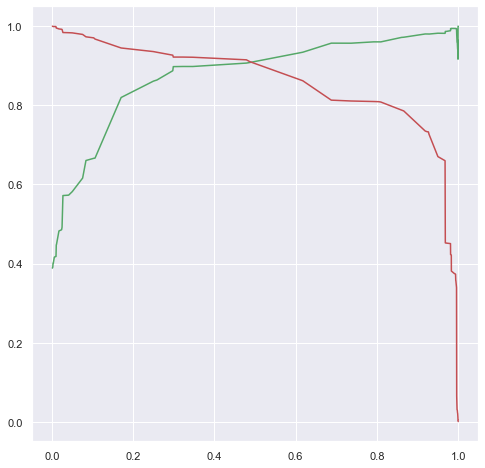

In [164]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 9: Making predictions on the test set

In [165]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [166]:
X_test = X_test[col2]
X_test.head()

,Lead Source_Welingak Website,Last Activity_SMS Sent,What is your current occupation_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Worst,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
5248,0,1,1,0,0,0,1,0,0,0,0,1,0
2136,0,0,0,0,0,0,0,0,0,0,0,1,0
3018,0,0,1,0,0,0,1,0,0,0,0,0,0
4492,0,0,0,0,0,0,1,0,0,0,0,0,1
9198,0,0,0,0,0,0,0,0,0,0,0,0,0


In [167]:
X_test_sm = sm.add_constant(X_test)

In [168]:
y_test_pred = Res.predict(X_test_sm)

In [169]:
y_test_pred[:10]

5248   0.1704
2136   0.0113
3018   0.1062
4492   0.2498
9198   0.0503
2144   0.1704
5741   0.4874
8294   0.0250
2002   0.9810
3977   0.9958
dtype: float64

We will convert the y test prediction dataset into a dataframe which is an array.

In [170]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [171]:
y_pred_1.head()

,0
5248,0.1704
2136,0.0113
3018,0.1062
4492,0.2498
9198,0.0503


We will convert the y test dataset into a dataframe. 

In [172]:
y_test_df = pd.DataFrame(y_test)

We will asign the customer IDs or Prospect IDs to the y test dataframe. 

In [173]:
y_test_df['Prospect ID'] = y_test_df.index

We will remove the index for both dataframes to append them side by side. 

In [174]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

We will merge both the dataframes. 

In [175]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,5248,0.1704
1,0,2136,0.0113
2,0,3018,0.1062
3,0,4492,0.2498
4,0,9198,0.0503


We will rename the column with the title 0.


In [176]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion Probability'})

In [177]:
y_pred_final.head()

,Converted,Prospect ID,Conversion Probability
0,0,5248,0.1704
1,0,2136,0.0113
2,0,3018,0.1062
3,0,4492,0.2498
4,0,9198,0.0503


We will now assign the final prediction values based on the 0.25 optimum point cut-off probability. 

In [178]:
y_pred_final['Final prediction'] = y_pred_final['Conversion Probability'].map(lambda x: 1 if x > 0.25 else 0)
y_pred_final.head()

,Converted,Prospect ID,Conversion Probability,Final prediction
0,0,5248,0.1704,0
1,0,2136,0.0113,0
2,0,3018,0.1062,0
3,0,4492,0.2498,0
4,0,9198,0.0503,0


**9.1 Accuracy and Confusion Matrix of the final model** 

We will proceed to find the accuracy of the final model.

In [179]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['Final prediction'])

0.92078460958129

We will proceed to find the confusion matrix of the final model.

In [180]:
confusion5 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['Final prediction'])
confusion5

array([[1497,  151],
       [  59,  944]], dtype=int64)

We will now proceed to find the sensitivity and specificity of the final model. 

**TP** - True Positive: confusion[1,1], **TN** - True Negatives: confusion[0,0], **FP** - False Positives: confusion[0,1], **FN** - False Negatives: confusion[1,0]

In [181]:
TP = confusion5[1,1] 
TN = confusion5[0,0] 
FP = confusion5[0,1]
FN = confusion5[1,0] 

Sensitivity - 

In [182]:
TP / float(TP+FN)

0.9411764705882353

Specificity - 

In [183]:
TN / float(TN+FP)

0.908373786407767